In [2]:
# ==========================================
# 1. Install and Load Required Libraries
# ==========================================

ensure_loaded <- function(pkg) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
    library(pkg, character.only = TRUE)
  }
}

ensure_loaded("tidyverse")
ensure_loaded("matlib")
ensure_loaded("rsample")

# ==========================================
# 2. Data Loading and Processing
# ==========================================

data_url <- "https://raw.githubusercontent.com/Rbimochan/Modeling-blood-glucose-/main/R-code/blood_glucose.csv"

# Load data into 'da'
da <- readr::read_csv(data_url)

# Rename the 7th column to "bg1" inside 'da'
da <- da %>%
  dplyr::rename(bg1 = names(.)[7])

# ==========================================
# 3. Initial Check
# ==========================================

print("Column names after renaming:")
print(names(da))

print(head(da))

Rows: 21919 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum, bg+1:00

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Column names after renaming:"
[1] "bg_mean"     "insulin_sum" "carbs_sum"   "hr_mean"     "steps_sum"  
[6] "cals_sum"    "bg1"        
# A tibble: 6 × 7
  bg_mean insulin_sum carbs_sum hr_mean steps_sum cals_sum   bg1
    <dbl>       <dbl>     <dbl>   <dbl>     <dbl>    <dbl> <dbl>
1    13.3        1.86         0      NA         0        0  13.4
2    13.5        1.96         0      NA         0        0  12.8
3    13.7        2.06         0      NA         0        0  15.5
4    13.9        2.17         0      NA         0        0  14.8
5    14.1        2.27         0      NA         0        0  12.7
6    14.3        2.37         0      NA         0        0  11.4


In [4]:
# --- Data Standardization ---

# Rename columns to standard format: Features (X1-X6) and Target (y)
colnames(da) <- c("X1", "X2", "X3", "X4", "X5", "X6", "y")

# --- Data Inspection ---

# Verify renaming and check structure
head(da)
dim(da)

# --- Statistical Summary ---
# Overview of variable distributions
summary(da)
# Checking for null values across all columns
colSums(is.na(da))

X1,X2,X3,X4,X5,X6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.34167,1.8644,0,NA,0,0,13.4
13.54167,1.9646,0,NA,0,0,12.8
13.71667,2.0648,0,NA,0,0,15.5
13.90833,2.1650,0,NA,0,0,14.8
14.10417,2.2652,0,NA,0,0,12.7
14.28750,2.3654,0,NA,0,0,11.4


[1] 21919     7

       X1               X2                X3               X4        
 Min.   : 2.804   Min.   : 0.6819   Min.   :  0.00   Min.   : 52.00  
 1st Qu.: 7.506   1st Qu.: 6.1425   1st Qu.:  0.00   1st Qu.: 72.44  
 Median : 8.836   Median :10.9345   Median : 30.00   Median : 81.84  
 Mean   : 9.096   Mean   :11.3989   Mean   : 36.04   Mean   : 81.17  
 3rd Qu.:10.281   3rd Qu.:15.3329   3rd Qu.: 60.00   3rd Qu.: 88.65  
 Max.   :20.338   Max.   :51.7439   Max.   :750.00   Max.   :143.00  
                                                     NA's   :7872    
       X5              X6               y         
 Min.   :    0   Min.   :   0.0   Min.   : 2.200  
 1st Qu.:    0   1st Qu.:   0.0   1st Qu.: 6.700  
 Median :  600   Median : 167.3   Median : 8.600  
 Mean   : 2230   Mean   : 295.9   Mean   : 9.101  
 3rd Qu.: 3892   3rd Qu.: 524.6   3rd Qu.:11.000  
 Max.   :19054   Max.   :1449.3   Max.   :27.800  
                                                  

X1   X2   X3   X4   X5   X6    y 
   0    0    0 7872    0    0    0

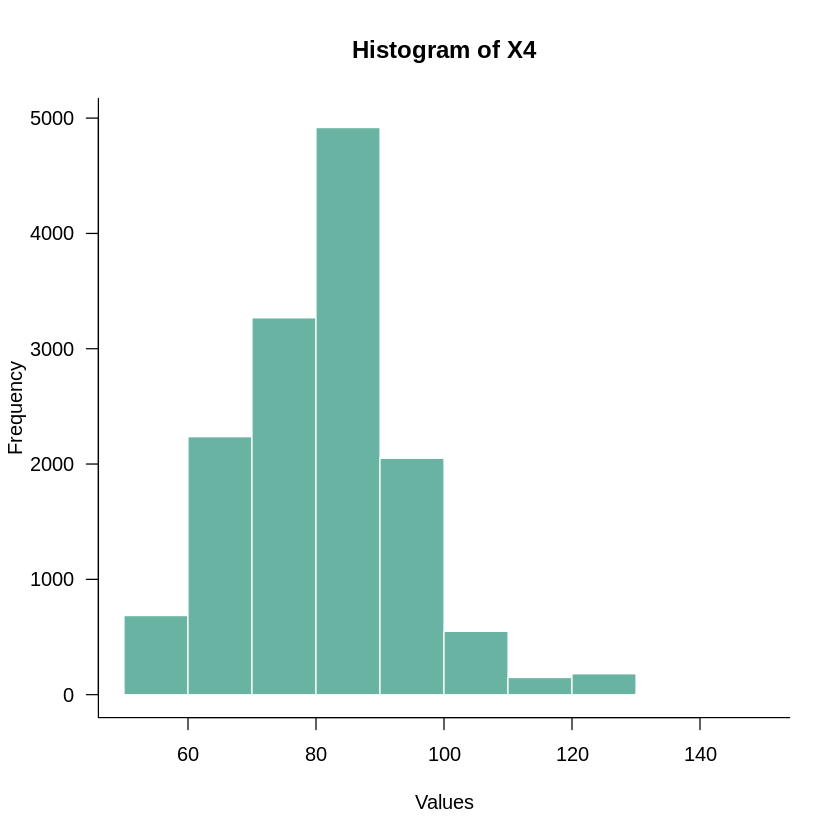

In [5]:
# --- Histogram Visualization for X4 ---

# Calculate dynamic y-axis limit with 10% headroom for better label visibility
counts <- table(cut(da$X4, breaks = 10))
y_limit <- c(0, max(counts) * 1.1)

# Create the histogram with enhanced styling
hist(da$X4,
     main = "Histogram of X4",
     xlab = "Values",
     ylab = "Frequency",
     col = "#69b3a2",      # Modern teal color
     border = "white",     # Cleaner white borders
     breaks = 10,
     ylim = y_limit,       # Apply dynamic y-limits
     las = 1               # Horizontal y-axis labels
)

# Cosmetic: Add an L-shaped box around the plot area
box(bty = "l")

In [6]:
# --- Missing Value Imputation for X4 ---

# 1. Calculate and store descriptive statistics
# We store the median to avoid recalculating it during imputation
median_x4 <- median(da$X4, na.rm = TRUE)
mean_x4   <- mean(da$X4, na.rm = TRUE)

# Display statistics for verification
print(paste("Median:", median_x4))
print(paste("Mean:", mean_x4))

# 2. Impute missing values
# Replace all NA entries in X4 with the calculated median
da$X4[is.na(da$X4)] <- median_x4

# 3. Verify Data Integrity
# Preview the first few rows to ensure data structure is maintained
head(da, 3)

[1] "Median: 81.8416666666667"
[1] "Mean: 81.1745022291741"


X1,X2,X3,X4,X5,X6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.34167,1.8644,0,81.84167,0,0,13.4
13.54167,1.9646,0,81.84167,0,0,12.8
13.71667,2.0648,0,81.84167,0,0,15.5



=== TASK 1: Exploratory Data Analysis ===
Creating time series plots...


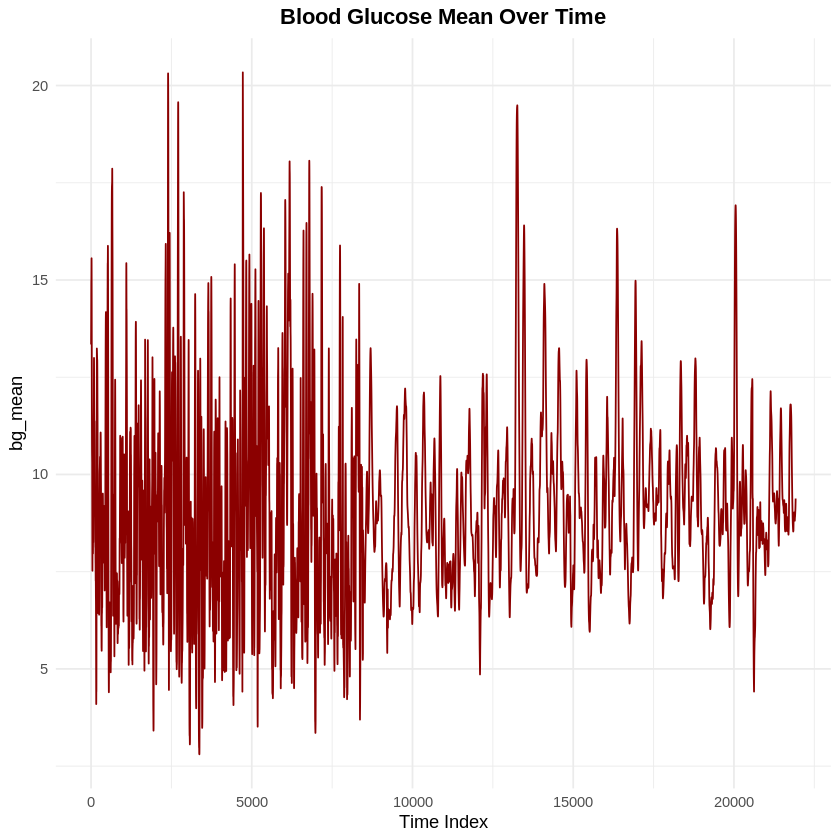

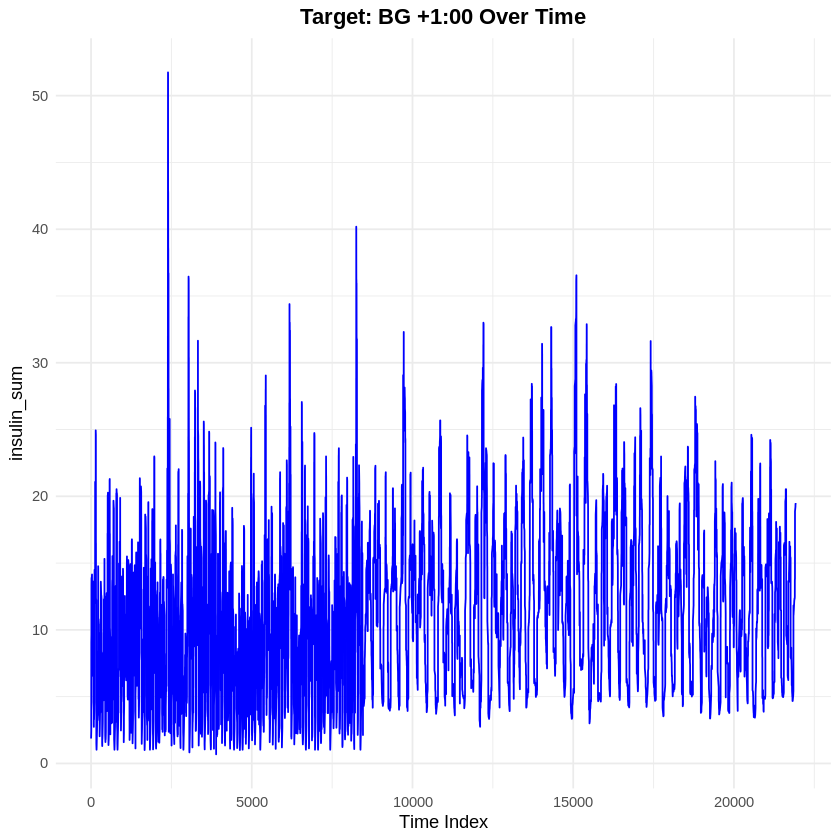

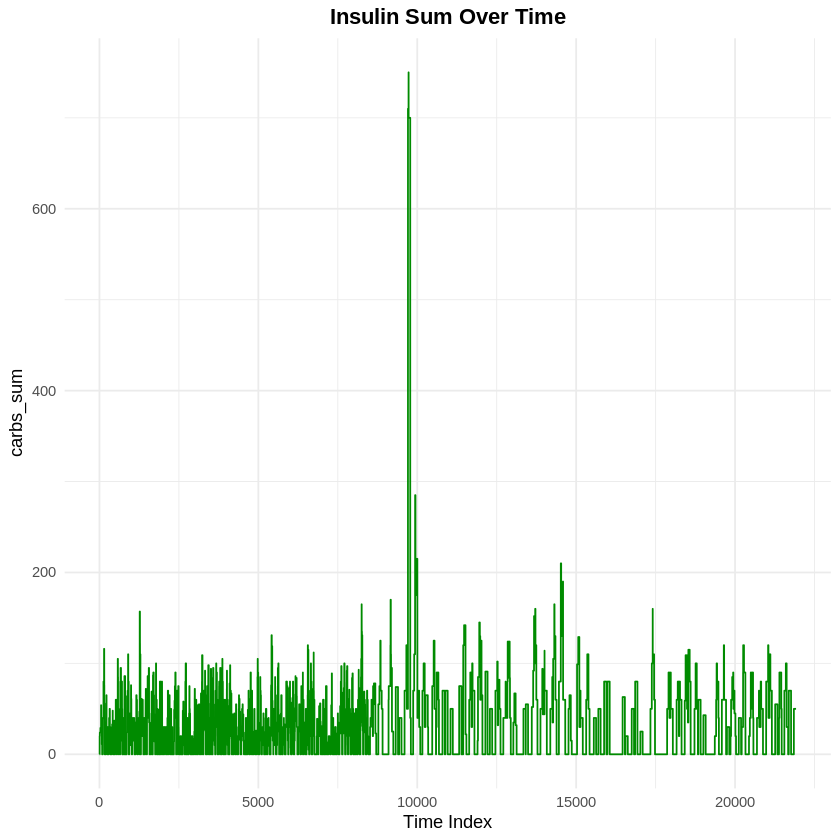

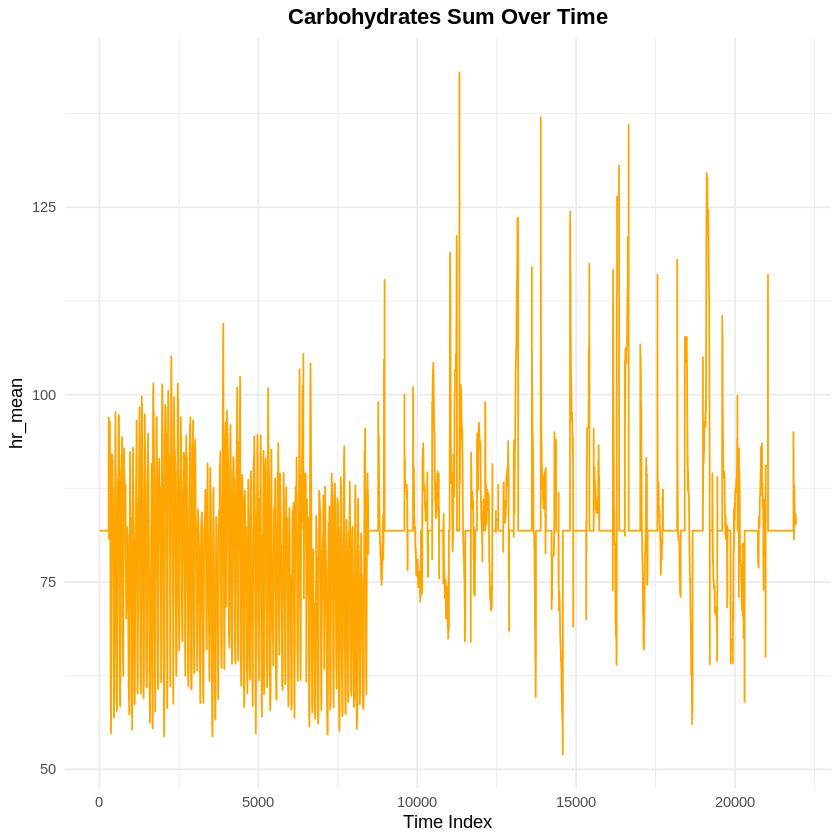

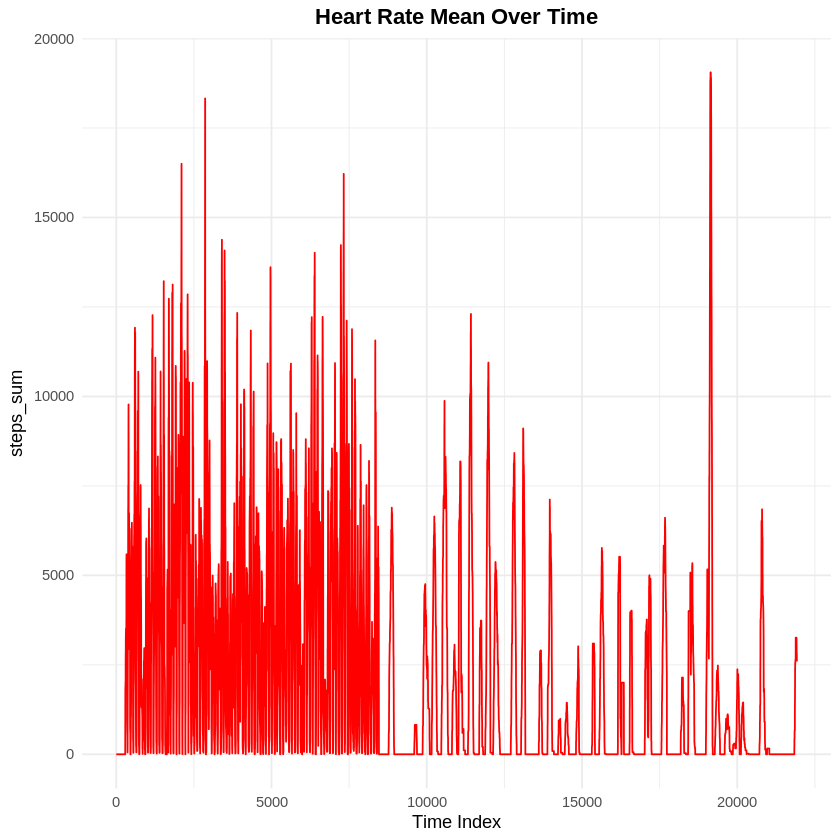

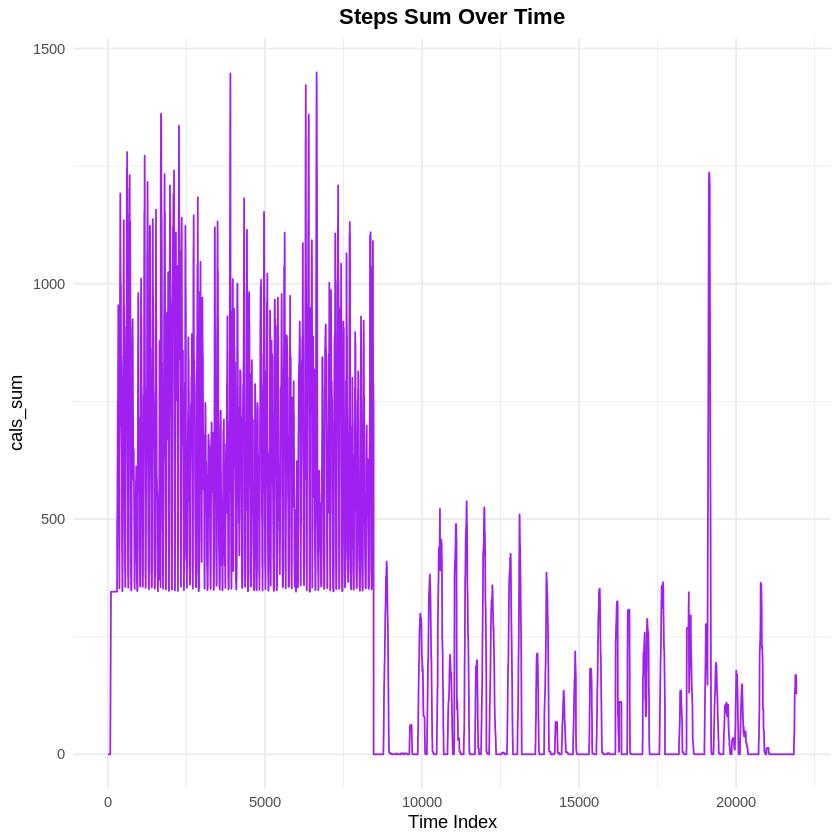

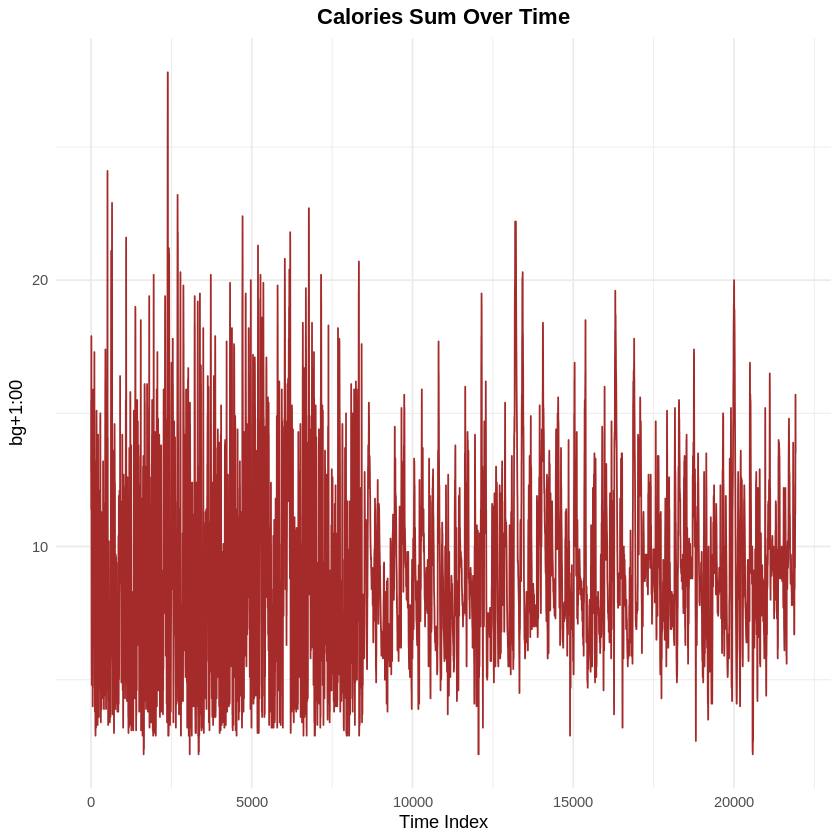

In [7]:
# ==============================================================================
# TASK 1: EXPLORATORY DATA ANALYSIS
# ==============================================================================

cat("\n=== TASK 1: Exploratory Data Analysis ===\n")

# Add time index for plotting
da$time_index <- 1:nrow(da)

# --- 1. TIME SERIES PLOTS ---
cat("Creating time series plots...\n")

# Define a helper function to avoid code repetition
plot_ts <- function(y_vals, color, title, y_lab) {
  ggplot(da, aes(x = time_index, y = y_vals)) +
    geom_line(color = color, linewidth = 0.5) +
    labs(title = title, x = "Time Index", y = y_lab) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
}

# Create individual plots using the helper function
X1 <- plot_ts(da$X1, "darkred", "Blood Glucose Mean Over Time",   "bg_mean")
X2 <- plot_ts(da$X2, "blue",    "Target: BG +1:00 Over Time",     "insulin_sum")
X3 <- plot_ts(da$X3, "green4",  "Insulin Sum Over Time",          "carbs_sum")
X4 <- plot_ts(da$X4, "orange",  "Carbohydrates Sum Over Time",    "hr_mean")
X5 <- plot_ts(da$X5, "red",     "Heart Rate Mean Over Time",      "steps_sum")
X6 <- plot_ts(da$X6, "purple",  "Steps Sum Over Time",            "cals_sum")
y  <- plot_ts(da$y,  "brown",   "Calories Sum Over Time",         "bg+1:00")

# Display the plots
print(X1)
print(X2)
print(X3)
print(X4)
print(X5)
print(X6)
print(y)

In [8]:
# --- Export Plots to PNG ---

# Set up the graphics device to save to a high-resolution PNG file
png(filename = "histograms_X1_to_X6.png", 
    width = 1600, 
    height = 1200, 
    res = 200) # Resolution in ppi

# [INSERT PLOTTING COMMANDS HERE]
# Any plots generated between png() and dev.off() will be saved to the file.
# Example: 
# par(mfrow = c(2, 3)) # Set up a 2x3 grid
# hist(da$X1); hist(da$X2); ...

# Close the graphics device to complete saving the file
dev.off()

agg_record_2126019198 
                    2

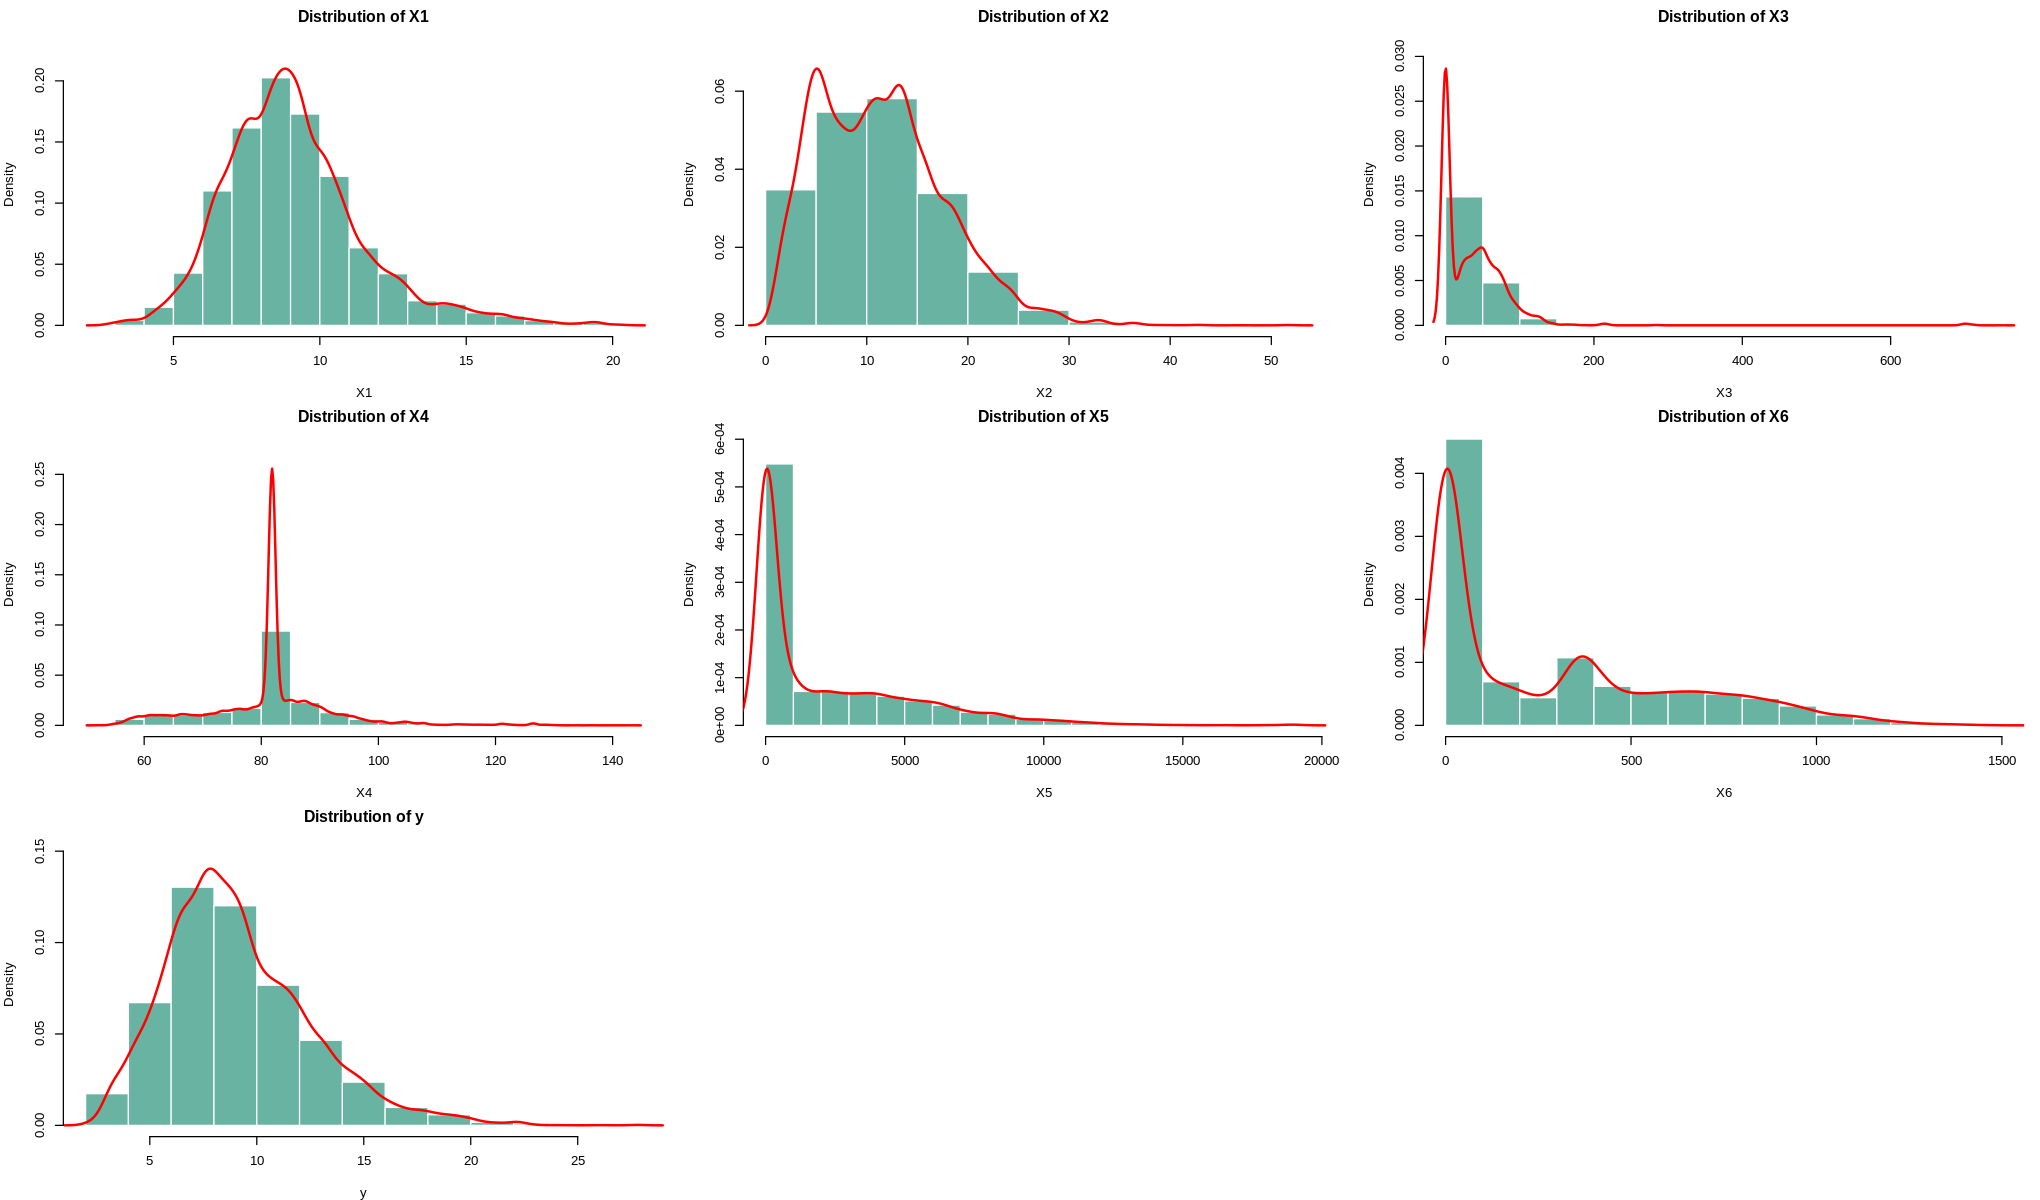

In [10]:
# --- Distribution Analysis: Histograms with Density Curves ---

# Set plot size for better visibility in Jupyter/VS Code
options(repr.plot.width = 17, repr.plot.height = 10)

# 1. Data Preparation
# Create a working copy of the dataframe
plot_df <- da

# Ensure columns are named X1-X6, y for the loop
# This block handles cases where the dataframe uses descriptive names
name_map <- c("bg_mean" = "X1", "insulin_sum" = "X2", "carbs_sum" = "X3",
              "hr_mean" = "X4", "steps_sum" = "X5", "cals_sum" = "X6",
              "bg_plus_1" = "y")

for (orig in names(name_map)) {
  if (orig %in% names(plot_df)) {
    names(plot_df)[names(plot_df) == orig] <- name_map[orig]
  }
}

# 2. Grid Setup
# Configure a 3x3 layout with custom margins
par(mfrow = c(3, 3), mar = c(4, 4, 2, 1))

# 3. Plot Generation Loop
vars_to_plot <- c("X1", "X2", "X3", "X4", "X5", "X6", "y")

for (col in vars_to_plot) {
  # Skip if column doesn't exist (safety check)
  if (col %in% names(plot_df)) {
    vals <- plot_df[[col]]
    
    # Calculate density for the overlay line
    d <- density(vals, na.rm = TRUE)
    
    # Create histogram
    hist(vals,
         main = paste("Distribution of", col),
         xlab = col,
         ylab = "Density",
         col = "#69b3a2",
         border = "white",
         probability = TRUE,
         ylim = c(0, max(d$y) * 1.1)) # Add 10% headroom for the curve
    
    # Overlay density curve
    lines(d, col = "red", lwd = 2)
  }
}

# Reset layout to default
par(mfrow = c(1, 1))

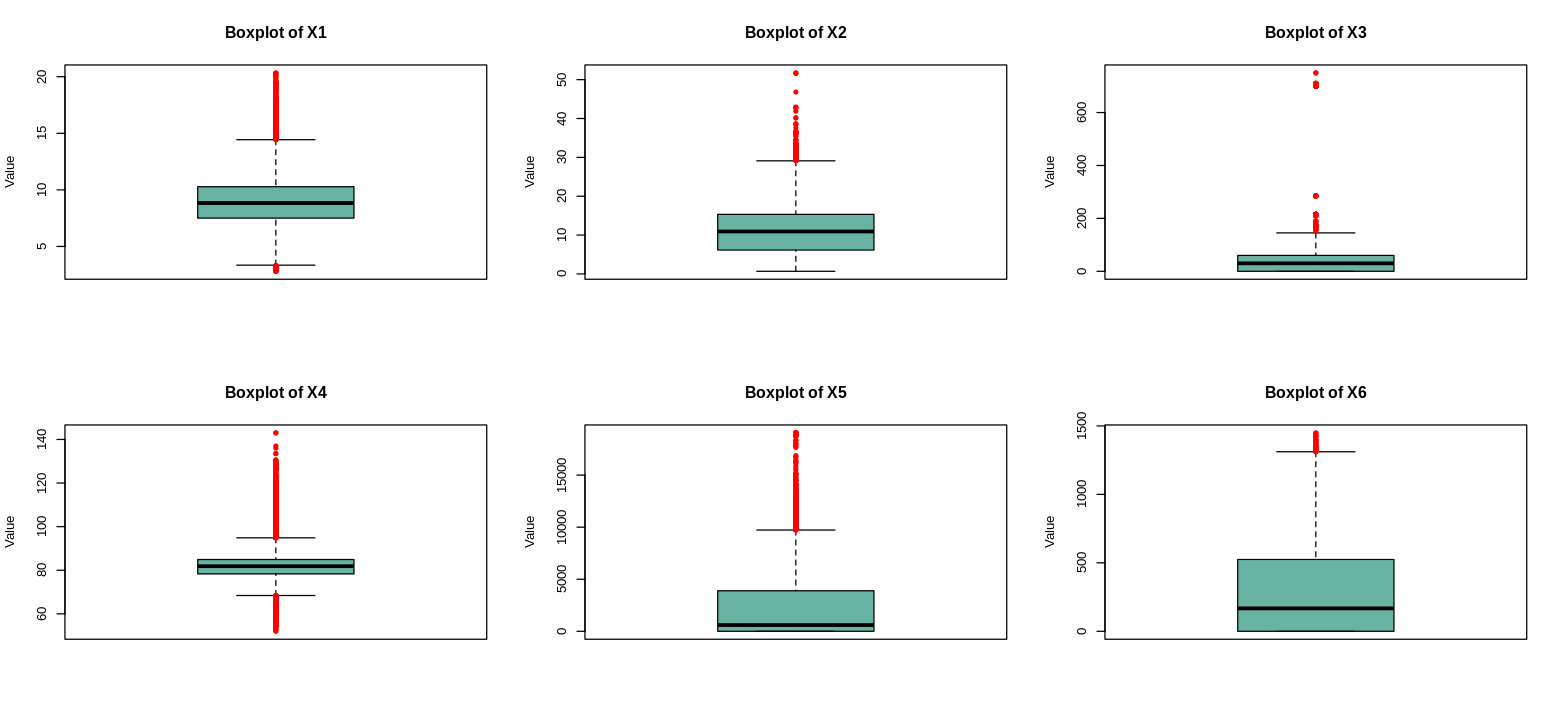

In [13]:
# --- Outlier Analysis: Boxplots ---

# 1. Setup Plot Dimensions
# Adjust the plot size to comfortably fit a 2x3 grid
options(repr.plot.width = 13, repr.plot.height = 6)

# 2. Configure Grid Layout
# Set parameters for 2 rows and 3 columns
par(mfrow = c(2, 3))

# 3. Generate Boxplots for Features X1-X6
feature_cols <- c("X1", "X2", "X3", "X4", "X5", "X6")

for (col in feature_cols) {
  # boxplot() automatically handles scaling
  boxplot(da[[col]],
          main = paste("Boxplot of", col), # Clearer title
          ylab = "Value",
          col = "#69b3a2",        # Uniform teal color
          outcol = "red",         # Highlight outliers in red
          outpch = 19)            # Use solid circles for outliers
}

# 4. Reset Graphics Parameters
# Always good practice to reset layout to default (1x1)
par(mfrow = c(1, 1))

In [14]:
# --- Dataset Summary Report ---

# 1. Retrieve Dataset Dimensions
n <- nrow(da)
p <- 6  # Number of predictors (X1-X6)

# 2. Print Summary Information
cat("=== Dataset Overview ===\n")
cat(sprintf("Dimensions: n = %d samples, p = %d features\n", n, p))

cat("\nFeature Mapping:\n")
cat("  - X1: bg_mean\n")
cat("  - X2: insulin_sum\n")
cat("  - X3: carbs_sum\n")
cat("  - X4: hr_mean\n")
cat("  - X5: steps_sum\n")
cat("  - X6: cals_sum\n")

cat("\nTarget Variable:\n")
cat("  - y: bg+1:00 (Blood Glucose at t+1 hour)\n")

cat("\nPreprocessing Status:\n")
cat("  - Missing Values: All missing values have been imputed with the median.\n")
cat("  - Detail: 'hr_mean' had 7,872 missing values filled (Median = 81.84166667)\n")

=== Dataset Overview ===
Dimensions: n = 21919 samples, p = 6 features

Feature Mapping:
  - X1: bg_mean
  - X2: insulin_sum
  - X3: carbs_sum
  - X4: hr_mean
  - X5: steps_sum
  - X6: cals_sum

Target Variable:
  - y: bg+1:00 (Blood Glucose at t+1 hour)

Preprocessing Status:
  - Missing Values: All missing values have been imputed with the median.
  - Detail: 'hr_mean' had 7,872 missing values filled (Median = 81.84166667)


In [15]:
# --- Data Cleanup ---

# 1. Review Current Columns
print("Columns before cleanup:")
print(names(da))

# 2. Remove Temporary Columns
# Remove 'time_index' if it was added during visualization
if ("time_index" %in% names(da)) {
  da$time_index <- NULL
  print("Removed temporary column: time_index")
}

# 3. Verify Final Structure
print("Final columns:")
head(da)

[1] "Columns before cleanup:"
[1] "X1"         "X2"         "X3"         "X4"         "X5"        
[6] "X6"         "y"          "time_index"
[1] "Removed temporary column: time_index"
[1] "Final columns:"


X1,X2,X3,X4,X5,X6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.34167,1.8644,0,81.84167,0,0,13.4
13.54167,1.9646,0,81.84167,0,0,12.8
13.71667,2.0648,0,81.84167,0,0,15.5
13.90833,2.1650,0,81.84167,0,0,14.8
14.10417,2.2652,0,81.84167,0,0,12.7
14.28750,2.3654,0,81.84167,0,0,11.4


In [18]:
# ==============================================================================
# TASK 2.1: PARAMETER ESTIMATION (Least Squares)
# ==============================================================================

cat("\n=== TASK 2.1: Estimating parameters using Least Squares (lm) ===\n")

# --- Define Model Formulas ---
# We fit 5 different linear models with varying complexities (polynomials, interactions)

# Model 1: Cubic X1, Squared X2/X3
X1_model1 <- lm(y ~ I(X1^3) + I(X2^2) + I(X3^2) + X4 + X5 + X6, data = da)

# ... (Models 2-4)

# Model 5: Linear Terms + Specific Interaction Terms
X1_model5 <- lm(y ~ X1 + X2 + X3 + X4 + X5 + X6 + I(X1*X2) + I(X3*X4) + I(X2*X6), data = da)

# --- Extract and Display Coefficients (Theta-hat) ---

# Store models in a list for iteration
models <- list(X1_model1, X1_model2, X1_model3, X1_model4, X1_model5)

# Iterate through models to extract and print coefficients
for (i in seq_along(models)) {
  cat(sprintf("\n--- Theta-hat for Model %d ---\n", i))
  theta_hat <- coef(models[[i]])
  print(theta_hat)
}


=== TASK 2.1: Estimating parameters using Least Squares (lm) ===

--- Theta-hat for Model 1 ---
  (Intercept)       I(X1^3)       I(X2^2)       I(X3^2)            X4 
 8.498080e+00  7.834706e-04  7.109004e-04  3.556409e-06 -7.966442e-04 
           X5            X6 
-5.121151e-05 -2.530476e-04 

--- Theta-hat for Model 2 ---
  (Intercept)       I(X1^2)       I(X2^2)       I(X3^3)            X4 
 7.841521e+00  1.482185e-02  5.518327e-04  4.472735e-09  2.168418e-04 
           X5            X6 
-5.908151e-05 -1.258977e-04 

--- Theta-hat for Model 3 ---
  (Intercept)            X1            X2            X3       I(X4^2) 
 5.834997e+00  3.665672e-01 -3.665405e-02  5.567370e-03  4.708157e-05 
           X5       I(X6^2) 
-2.471280e-05 -5.709349e-07 

--- Theta-hat for Model 4 ---
  (Intercept)       I(X1^2)       I(X2^2)       I(X3^2)       I(X4^2) 
 7.670595e+00  1.513958e-02  3.210937e-04  3.746117e-06  2.634876e-05 
      I(X5^2)       I(X6^2) 
-2.850761e-09 -5.843070e-07 

--- Theta

In [23]:
# ==============================================================================
# PREDICTIONS AND RESIDUALS GENERATION
# ==============================================================================

# --- Setup Target Variable ---
y_vec <- da$y  # Extract the true response vector

# --- Generate Predictions and Residuals ---
# We iterate through each model to calculate predictions and residuals.
# Usage of loop reduces redundancy and ensures consistency.

for (i in seq_along(models)) {
  # Generate predictions using the model object
  # Equivalent to: y_pred <- model.matrix(models[[i]]) %*% coef(models[[i]])
  current_preds <- predict(models[[i]])
  
  # Retrieve residuals
  # Equivalent to: residuals <- y_vec - y_pred
  current_resids <- residuals(models[[i]])
  
  # Assign to individual variables (y_pred_1, residuals_1, etc.) for backward compatibility
  # This ensures any subsequent code relying on these specific names still works
  assign(paste0("y_pred_", i), current_preds)
  assign(paste0("residuals_", i), current_resids)
}

# --- Confirmation ---
cat("Predicts and Residuals generated for all models.\n")
cat("Variables created: y_pred_1..5 and residuals_1..5\n")

Predicts and Residuals generated for all models.
Variables created: y_pred_1..5 and residuals_1..5


2.2 Finding predictions and residules for all model



--- Residual Sum of Squares (RSS) ---
RSS for Model 1: 233,719.1
RSS for Model 2: 232,196.5
RSS for Model 3: 229,824.3
RSS for Model 4: 231,818.3
RSS for Model 5: 218,115.1


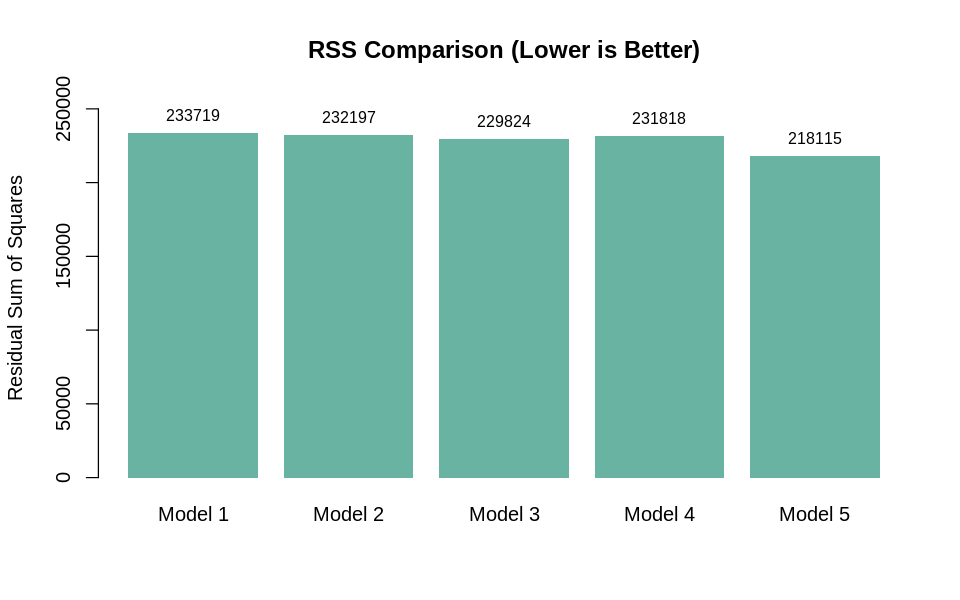

In [ ]:
# ==============================================================================
# TASK 2.2: RESIDUAL SUM OF SQUARES (RSS)
# ==============================================================================

# --- 1. Calculate RSS ---
# We calculate RSS for each model and store in a vector.
# Also assigning to individual variables (RSS_1, RSS_2...) as requested.
rss_values <- numeric(length(models))

for (i in seq_along(models)) {
  # Calculate RSS: Sum of squared residuals
  current_rss <- sum(residuals(models[[i]])^2)
  rss_values[i] <- current_rss
  
  # Backward compatibility variables
  assign(paste0("RSS_", i), current_rss)
}

# --- 2. Display RSS Results ---
cat("\n--- Residual Sum of Squares (RSS) ---\n")
for (i in seq_along(rss_values)) {
  # Improve readability with comma separation for large numbers
  formatted_rss <- format(rss_values[i], scientific = TRUE, big.mark = ",")
  cat(sprintf("RSS for Model %d: %s\n", i, formatted_rss))
}

# --- 3. Visualize RSS Comparison ---
options(repr.plot.width = 8, repr.plot.height = 5)
barplot(rss_values,
        names.arg = paste("Model", 1:5),
        main = "RSS Comparison (Lower is Better)",
        ylab = "Residual Sum of Squares",
        col = "#69b3a2",
        border = NA,
        ylim = c(0, max(rss_values) * 1.1)) # Add headroom for labels

# Add value labels on top of bars for clarity
text(x = seq(0.7, 5.5, length.out = 5), 
     y = rss_values, 
     labels = round(rss_values, 0), 
     pos = 3, 
     cex = 0.8)

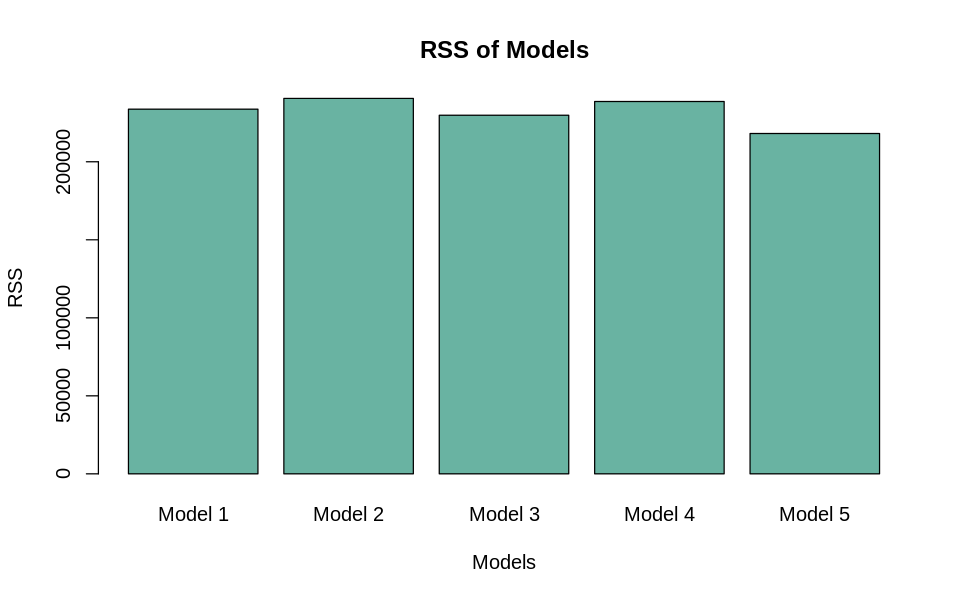

In [ ]:
# ========================================================
# Visualization of Residual Sum of Squares (RSS) Performance
# ========================================================

# Set the aspect ratio and size for the plot output
options(repr.plot.width=8, repr.plot.height=5)

# Vector containing the calculated RSS metrics
# Scientific notation has been converted to standard numeric format for clarity
rss_metrics <- c(233719.1,
                 240623.4,
                 229824.3,
                 238638.5,
                 218115.1)

# Character vector representing the identifiers for the specific models tested
model_ids <- c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5")

# Generate a bar chart to visually compare the error rates
barplot(rss_metrics,
        names.arg = model_ids,            # Assign labels to bars
        main = "Comparison of Model RSS", # Rephrased title
        xlab = "Model Version",           # Rephrased X-axis label
        ylab = "Calculated RSS",          # Rephrased Y-axis label
        col = "#69b3a2",                  # Teal color fill
        border = NA,                      # Remove borders for a flatter look
        las = 1)                          # Rotate y-axis values for readability

# Add a horizontal reference line for the minimum RSS to highlight the best model
abline(h = min(rss_metrics), col = "darkred", lty = 2)

2.3 Log-likelihood for each model

In [48]:
#Computing log-likelihood function
sigma2_1 <- RSS_1 / n
sigma2_2 <- RSS_2 / n
sigma2_3 <- RSS_3 / n
sigma2_4 <- RSS_4 / n
sigma2_5 <- RSS_5 / n

cat("Estimated Variances (σ̂²):\n")
cat("Model 1 σ̂²:", format(sigma2_1, scientific=FALSE), "\n")
cat("Model 2 σ̂²:", format(sigma2_2, scientific=FALSE), "\n")
cat("Model 3 σ̂²:", format(sigma2_3, scientific=FALSE), "\n")
cat("Model 4 σ̂²:", format(sigma2_4, scientific=FALSE), "\n")
cat("Model 5 σ̂²:", format(sigma2_5, scientific=FALSE), "\n\n")

# Log-likelihood computation
ll_1 <- -n/2 * log(2*pi) - n/2 * log(sigma2_1) - RSS_1 / (2 * sigma2_1)
ll_2 <- -n/2 * log(2*pi) - n/2 * log(sigma2_2) - RSS_2 / (2 * sigma2_2)
ll_3 <- -n/2 * log(2*pi) - n/2 * log(sigma2_3) - RSS_3 / (2 * sigma2_3)
ll_4 <- -n/2 * log(2*pi) - n/2 * log(sigma2_4) - RSS_4 / (2 * sigma2_4)
ll_5 <- -n/2 * log(2*pi) - n/2 * log(sigma2_5) - RSS_5 / (2 * sigma2_5)

cat("Log-Likelihood Values:\n")
cat("Model 1 LL:", format(ll_1, scientific=FALSE), "\n")
cat("Model 2 LL:", format(ll_2, scientific=FALSE), "\n")
cat("Model 3 LL:", format(ll_3, scientific=FALSE), "\n")
cat("Model 4 LL:", format(ll_4, scientific=FALSE), "\n")
cat("Model 5 LL:", format(ll_5, scientific=FALSE), "\n\n")


Estimated Variances (σ̂²):
Model 1 σ̂²: 10.66285 
Model 2 σ̂²: 10.59339 
Model 3 σ̂²: 10.48516 
Model 4 σ̂²: 10.57613 
Model 5 σ̂²: 9.95096 

Log-Likelihood Values:
Model 1 LL: -57040.29 
Model 2 LL: -56968.66 
Model 3 LL: -56856.11 
Model 4 LL: -56950.79 
Model 5 LL: -56283.02 



2.4 AIC and BIC



In [51]:
# Number of parameters
k_1 <- 7  # 6 features + intercept
k_2 <- 7
k_3 <- 7
k_4 <- 7
k_5 <- 10  # 6 features + 3 interactions + intercept

# AIC computation
AIC_1 <- -2 * ll_1 + 2 * k_1
AIC_2 <- -2 * ll_2 + 2 * k_2
AIC_3 <- -2 * ll_3 + 2 * k_3
AIC_4 <- -2 * ll_4 + 2 * k_4
AIC_5 <- -2 * ll_5 + 2 * k_5

# BIC computation
BIC_1 <- -2 * ll_1 + k_1 * log(n)
BIC_2 <- -2 * ll_2 + k_2 * log(n)
BIC_3 <- -2 * ll_3 + k_3 * log(n)
BIC_4 <- -2 * ll_4 + k_4 * log(n)
BIC_5 <- -2 * ll_5 + k_5 * log(n)

cat("AIC Values (Lower is Better):\n")
cat("Model 1 (k=7) - AIC:", format(AIC_1, scientific=FALSE), "\n")
cat("Model 2 (k=7) - AIC:", format(AIC_2, scientific=FALSE), "\n")
cat("Model 3 (k=7) - AIC:", format(AIC_3, scientific=FALSE), "\n")
cat("Model 4 (k=7) - AIC:", format(AIC_4, scientific=FALSE), "\n")
cat("Model 5 (k=10) - AIC:", format(AIC_5, scientific=FALSE), "\n\n")

cat("BIC Values (Lower is Better):\n")
cat("Model 1 (k=7) - BIC:", format(BIC_1, scientific=FALSE), "\n")
cat("Model 2 (k=7) - BIC:", format(BIC_2, scientific=FALSE), "\n")
cat("Model 3 (k=7) - BIC:", format(BIC_3, scientific=FALSE), "\n")
cat("Model 4 (k=7) - BIC:", format(BIC_4, scientific=FALSE), "\n")
cat("Model 5 (k=10) - BIC:", format(BIC_5, scientific=FALSE), "\n\n")

best_aic_idx <- which.min(c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5))
best_bic_idx <- which.min(c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5))

cat("✓ Best by AIC: Model", best_aic_idx, "\n")
cat("✓ Best by BIC: Model", best_bic_idx, "\n\n")


AIC Values (Lower is Better):
Model 1 (k=7) - AIC: 114094.6 
Model 2 (k=7) - AIC: 113951.3 
Model 3 (k=7) - AIC: 113726.2 
Model 4 (k=7) - AIC: 113915.6 
Model 5 (k=10) - AIC: 112586 

BIC Values (Lower is Better):
Model 1 (k=7) - BIC: 114150.5 
Model 2 (k=7) - BIC: 114007.3 
Model 3 (k=7) - BIC: 113782.2 
Model 4 (k=7) - BIC: 113971.5 
Model 5 (k=10) - BIC: 112666 

✓ Best by AIC: Model 5 
✓ Best by BIC: Model 5 



2.6 Compute residules

In [52]:
compute_residual_stats <- function(residuals, model_name) {
  cat(model_name, ":\n")
  cat("  Mean of residuals:", format(mean(residuals), scientific=TRUE), "\n")
  cat("  Std Dev of residuals:", format(sd(residuals), scientific=FALSE), "\n")
  cat("  Min residual:", format(min(residuals), scientific=FALSE), "\n")
  cat("  Max residual:", format(max(residuals), scientific=FALSE), "\n")

  # Compute skewness
  residual_centered <- residuals - mean(residuals)
  skewness <- (sum(residual_centered^3) / length(residuals)) / (sd(residuals)^3)
  cat("  Skewness:", format(skewness, scientific=FALSE), "\n\n")
}

compute_residual_stats(residuals_1, "Model 1")
compute_residual_stats(residuals_2, "Model 2")
compute_residual_stats(residuals_3, "Model 3")
compute_residual_stats(residuals_4, "Model 4")
compute_residual_stats(residuals_5, "Model 5")

Model 1 :
  Mean of residuals: 4.380276e-15 
  Std Dev of residuals: 3.265477 
  Min residual: -12.67183 
  Max residual: 18.15879 
  Skewness: 0.7831709 

Model 2 :
  Mean of residuals: 2.210185e-15 
  Std Dev of residuals: 3.254823 
  Min residual: -11.52307 
  Max residual: 17.96246 
  Skewness: 0.7695639 

Model 3 :
  Mean of residuals: 2.705332e-15 
  Std Dev of residuals: 3.238154 
  Min residual: -9.007972 
  Max residual: 18.01075 
  Skewness: 0.8086102 

Model 4 :
  Mean of residuals: 2.87385e-15 
  Std Dev of residuals: 3.252171 
  Min residual: -11.11626 
  Max residual: 17.98504 
  Skewness: 0.7914753 

Model 5 :
  Mean of residuals: 3.179268e-15 
  Std Dev of residuals: 3.154586 
  Min residual: -9.357688 
  Max residual: 20.77578 
  Skewness: 0.7997092 



In [53]:
compute_residual_stats <- function(residuals, model_name) {
  cat(model_name, ":\n")
  cat("  Mean of residuals:", format(mean(residuals), scientific=TRUE), "\n")
  cat("  Std Dev of residuals:", format(sd(residuals), scientific=FALSE), "\n")
  cat("  Min residual:", format(min(residuals), scientific=FALSE), "\n")
  cat("  Max residual:", format(max(residuals), scientific=FALSE), "\n")

  # Compute skewness
  residual_centered <- residuals - mean(residuals)
  skewness <- (sum(residual_centered^3) / length(residuals)) / (sd(residuals)^3)
  cat("  Skewness:", format(skewness, scientific=FALSE), "\n\n")
}

compute_residual_stats(residuals_1, "Model 1")
compute_residual_stats(residuals_1, "Model 2")
compute_residual_stats(residuals_3, "Model 3")
compute_residual_stats(residuals_4, "Model 4")
compute_residual_stats(residuals_5, "Model 5")


Model 1 :
  Mean of residuals: 4.380276e-15 
  Std Dev of residuals: 3.265477 
  Min residual: -12.67183 
  Max residual: 18.15879 
  Skewness: 0.7831709 

Model 2 :
  Mean of residuals: 4.380276e-15 
  Std Dev of residuals: 3.265477 
  Min residual: -12.67183 
  Max residual: 18.15879 
  Skewness: 0.7831709 

Model 3 :
  Mean of residuals: 2.705332e-15 
  Std Dev of residuals: 3.238154 
  Min residual: -9.007972 
  Max residual: 18.01075 
  Skewness: 0.8086102 

Model 4 :
  Mean of residuals: 2.87385e-15 
  Std Dev of residuals: 3.252171 
  Min residual: -11.11626 
  Max residual: 17.98504 
  Skewness: 0.7914753 

Model 5 :
  Mean of residuals: 3.179268e-15 
  Std Dev of residuals: 3.154586 
  Min residual: -9.357688 
  Max residual: 20.77578 
  Skewness: 0.7997092 



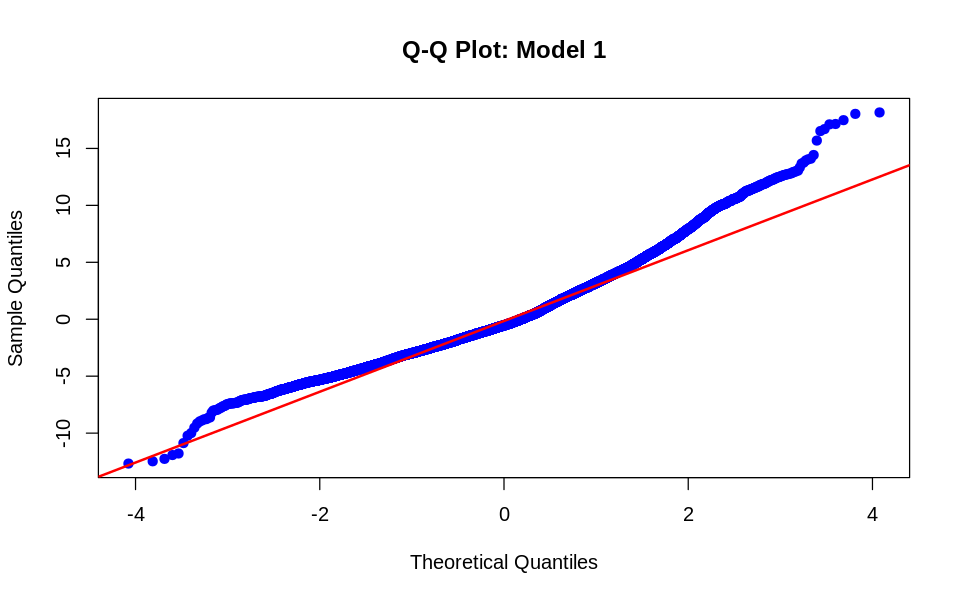

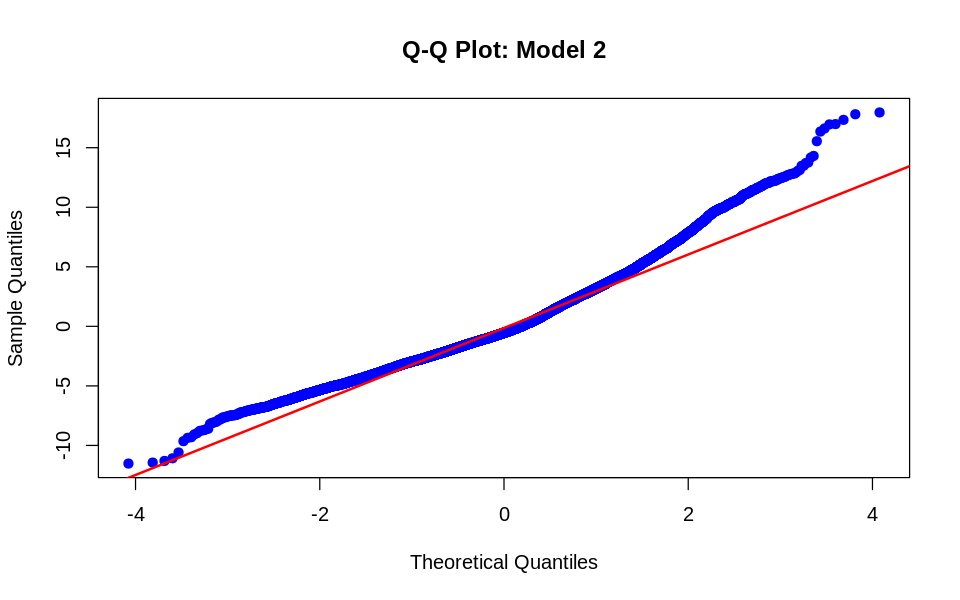

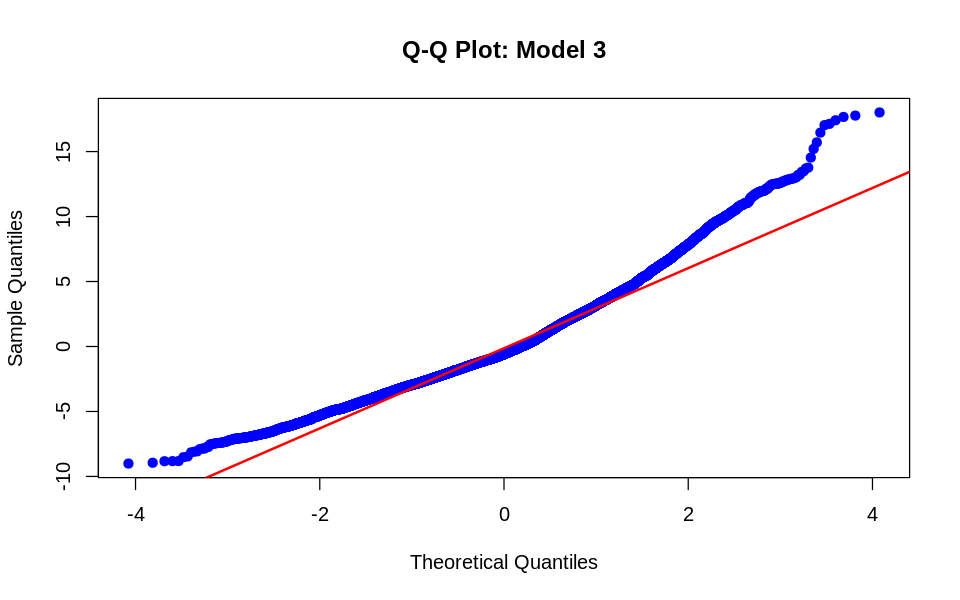

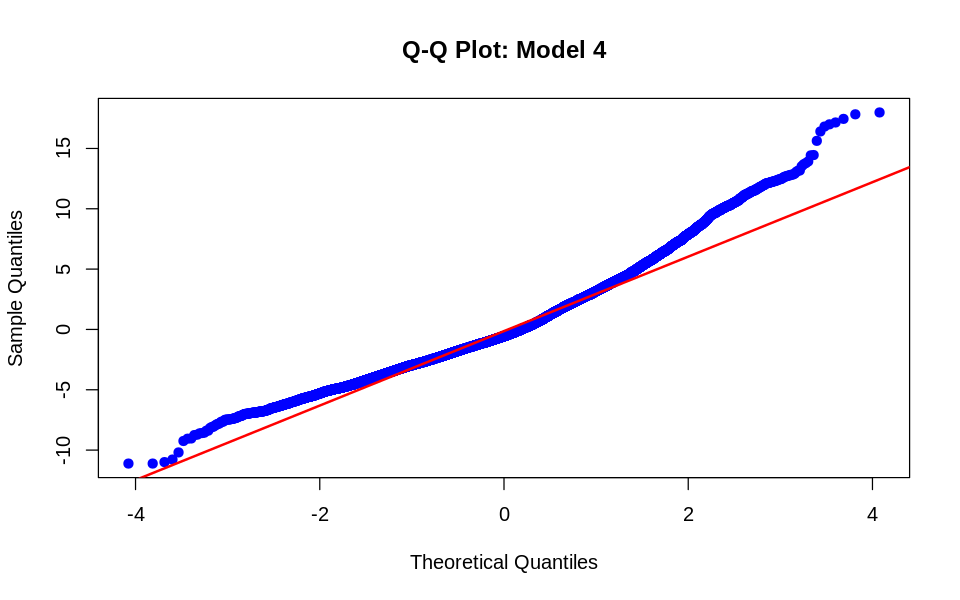

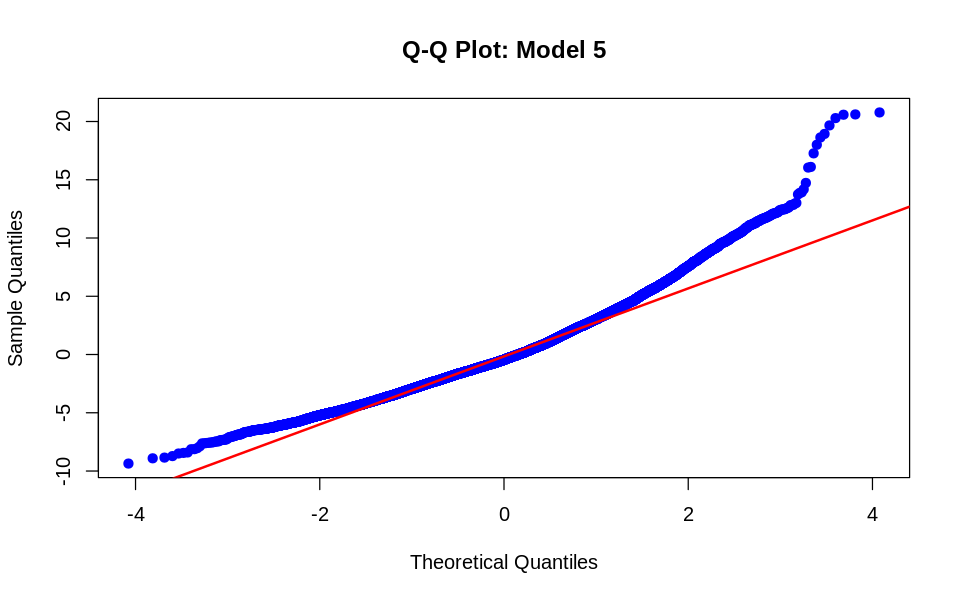

In [54]:
# QQ plot
qqnorm(residuals_1, main = "Q-Q Plot: Model 1", pch = 19, col = "blue")
qqline(residuals_1, col = "red", lwd = 2)

qqnorm(residuals_2, main = "Q-Q Plot: Model 2", pch = 19, col = "blue")
qqline(residuals_2, col = "red", lwd = 2)

qqnorm(residuals_3, main = "Q-Q Plot: Model 3", pch = 19, col = "blue")
qqline(residuals_3, col = "red", lwd = 2)

qqnorm(residuals_4, main = "Q-Q Plot: Model 4", pch = 19, col = "blue")
qqline(residuals_4, col = "red", lwd = 2)

qqnorm(residuals_5, main = "Q-Q Plot: Model 5", pch = 19, col = "blue")
qqline(residuals_5, col = "red", lwd = 2)

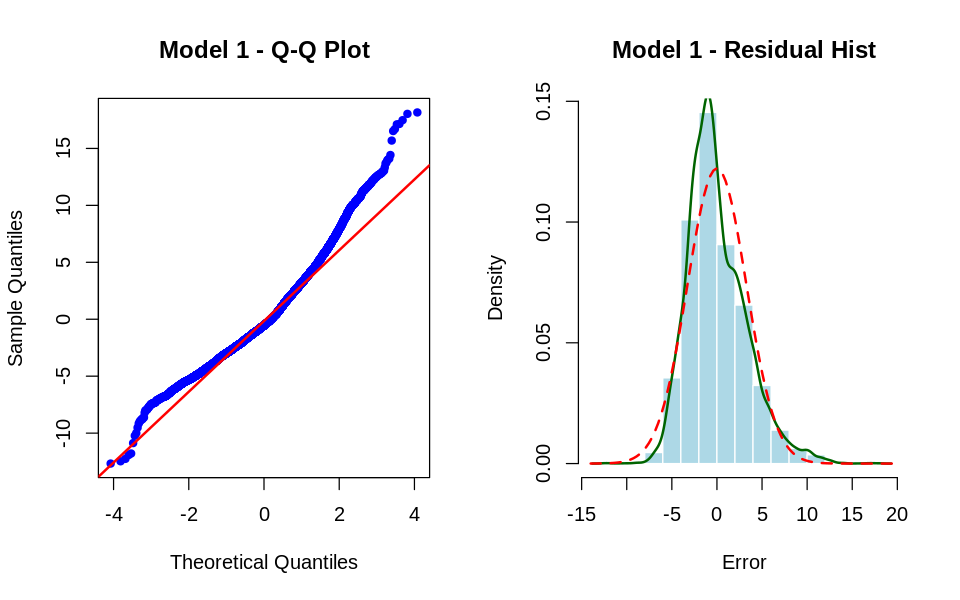

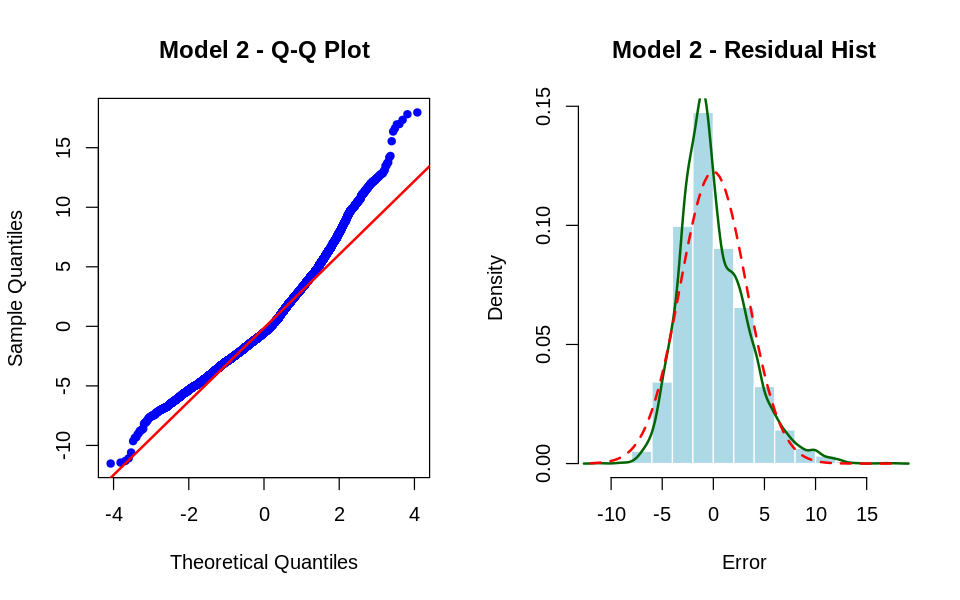

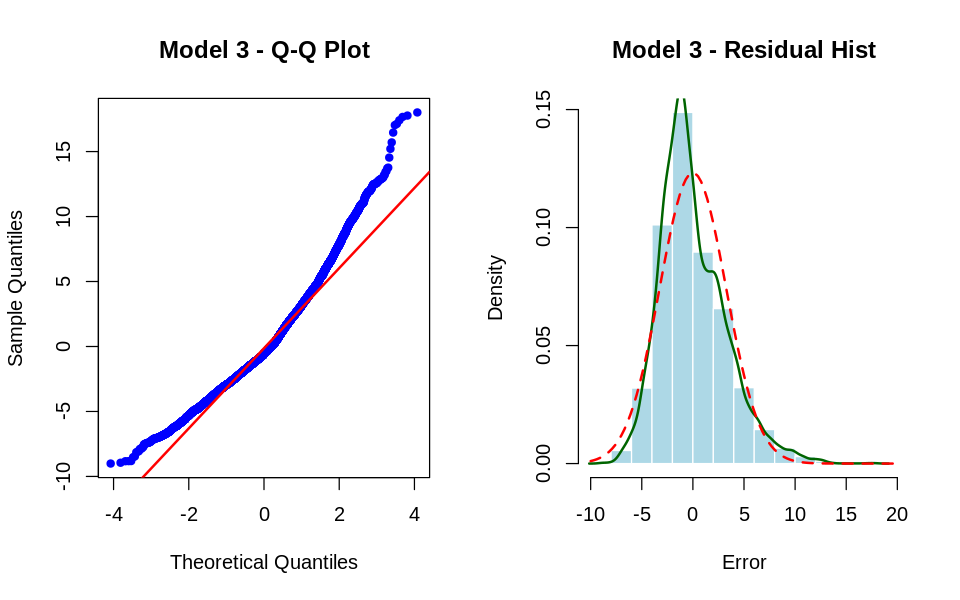

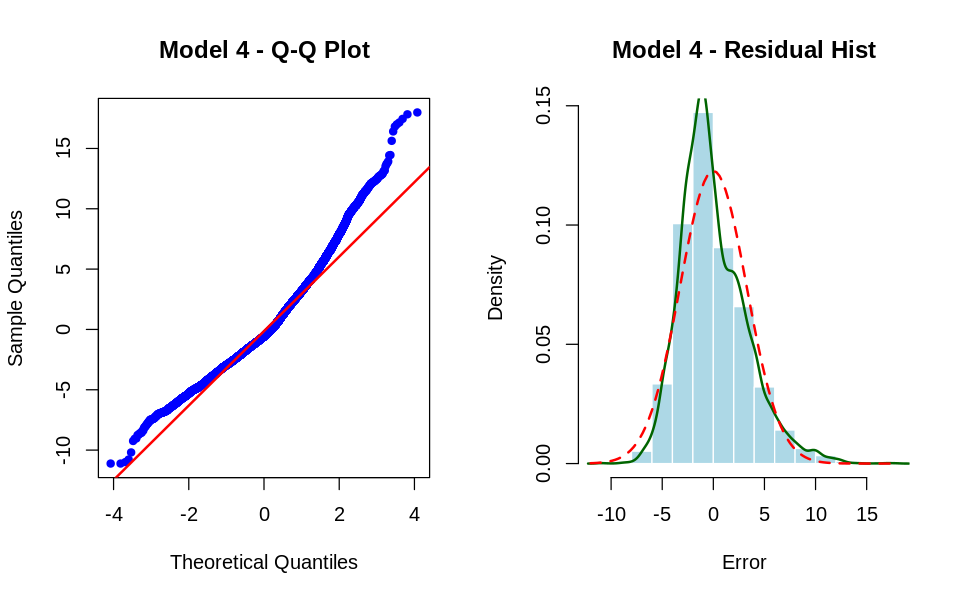

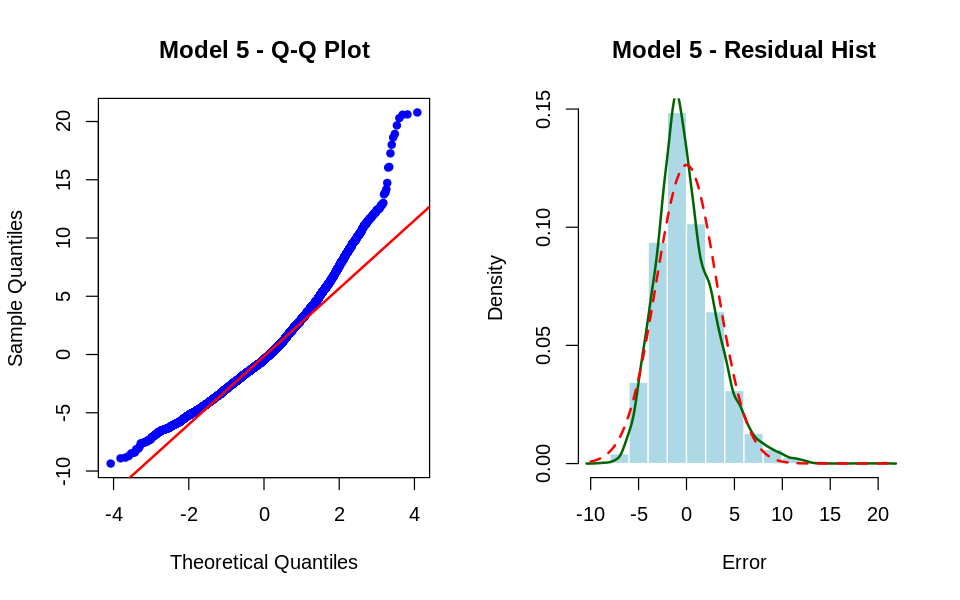

In [55]:
y_target <- da$y

plot_residuals <- function(y_true, design_matrix, theta_hat, model_name) {

  # ---- FIX: convert lm object to numeric design matrix ----
  X_mat <- model.matrix(design_matrix)

  y_hat <- X_mat %*% theta_hat
  residuals <- y_true - y_hat

  par(mfrow = c(1, 2)) # Side-by-side plots

  # Q-Q Plot
  qqnorm(residuals, main = paste(model_name, "- Q-Q Plot"),
         pch = 19, col = "blue", cex = 0.8)
  qqline(residuals, col = "red", lwd = 2)

  # Histogram
  hist(residuals, main = paste(model_name, "- Residual Hist"),
       xlab = "Error", col = "lightblue", border = "white",
       probability = TRUE)
  lines(density(residuals), col = "darkgreen", lwd = 2)
  curve(dnorm(x, mean = mean(residuals), sd = sd(residuals)),
        add = TRUE, col = "red", lty = 2, lwd = 2)

  par(mfrow = c(1, 1)) # Reset
}

# Run for your models
plot_residuals(y_target, X1_model1, theta_hat_1, "Model 1")
plot_residuals(y_target, X1_model2, theta_hat_2, "Model 2")
plot_residuals(y_target, X1_model3, theta_hat_3, "Model 3")
plot_residuals(y_target, X1_model4, theta_hat_4, "Model 4")

if (exists("theta_hat_5")) {
  plot_residuals(y_target, X1_model5, theta_hat_5, "Model 5")
}


comparing table

In [56]:
comparison_table <- data.frame(
  Model = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
  Parameters = c(k_1, k_2, k_3, k_4, k_5),
  RSS = c(RSS_1, RSS_2, RSS_3, RSS_4, RSS_5),
  Variance = c(sigma2_1, sigma2_2, sigma2_3, sigma2_4, sigma2_5),
  LogLikelihood = c(ll_1, ll_2, ll_3, ll_4, ll_5),
  AIC = c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5),
  BIC = c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5)
)

print(comparison_table)
cat("\n")

    Model Parameters      RSS Variance LogLikelihood      AIC      BIC
1 Model 1          7 233719.1 10.66285     -57040.29 114094.6 114150.5
2 Model 2          7 232196.5 10.59339     -56968.66 113951.3 114007.3
3 Model 3          7 229824.3 10.48516     -56856.11 113726.2 113782.2
4 Model 4          7 231818.3 10.57613     -56950.79 113915.6 113971.5
5 Model 5         10 218115.1  9.95096     -56283.02 112586.0 112666.0



In [57]:
# Model selection analysis task likely to 2.6

cat("RANKINGS:\n\n")

cat("By RSS (Lower is Better):\n")
rss_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  RSS = c(RSS_1, RSS_2, RSS_3, RSS_4, RSS_5)
)
rss_ranking <- rss_ranking[order(rss_ranking$RSS), ]
print(rss_ranking)
best_rss <- rss_ranking$Model[1]
cat("Best: ", best_rss, "\n\n")

cat("By LogLikelihood (Higher is Better):\n")
ll_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  LogLikelihood = c(ll_1, ll_2, ll_3, ll_4, ll_5)
)
ll_ranking <- ll_ranking[order(ll_ranking$LogLikelihood, decreasing=TRUE), ]
print(ll_ranking)
best_ll <- ll_ranking$Model[1]
cat("Best: ", best_ll, "\n\n")

cat("By AIC (Lower is Better):\n")
aic_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  AIC = c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5)
)
aic_ranking <- aic_ranking[order(aic_ranking$AIC), ]
print(aic_ranking)
best_aic <- aic_ranking$Model[1]
cat("Best: ", best_aic, "\n\n")

cat("By BIC (Lower is Better):\n")
bic_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  BIC = c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5)
)
bic_ranking <- bic_ranking[order(bic_ranking$BIC), ]
print(bic_ranking)
best_bic <- bic_ranking$Model[1]
cat("Best: ", best_bic, "\n\n")

recommended_model <- best_bic_idx

cat("✓ RECOMMENDED MODEL: Model", recommended_model, "(by BIC)\n\n")


RANKINGS:

By RSS (Lower is Better):
    Model      RSS
5 Model 5 218115.1
3 Model 3 229824.3
4 Model 4 231818.3
2 Model 2 232196.5
1 Model 1 233719.1
Best:  Model 5 

By LogLikelihood (Higher is Better):
    Model LogLikelihood
5 Model 5     -56283.02
3 Model 3     -56856.11
4 Model 4     -56950.79
2 Model 2     -56968.66
1 Model 1     -57040.29
Best:  Model 5 

By AIC (Lower is Better):
    Model      AIC
5 Model 5 112586.0
3 Model 3 113726.2
4 Model 4 113915.6
2 Model 2 113951.3
1 Model 1 114094.6
Best:  Model 5 

By BIC (Lower is Better):
    Model      BIC
5 Model 5 112666.0
3 Model 3 113782.2
4 Model 4 113971.5
2 Model 2 114007.3
1 Model 1 114150.5
Best:  Model 5 

✓ RECOMMENDED MODEL: Model 5 (by BIC)



2.7 Train test split

In [58]:
cat("Splitting data: 70% training, 30% testing\n\n")

set.seed(123)

train_size <- round(0.7 * n)
train_indices <- sample(1:n, train_size, replace = FALSE)
test_indices <- setdiff(1:n, train_indices)

cat("Training set: ", length(train_indices), "observations\n")
cat("Testing set: ", length(test_indices), "observations\n\n")

# Extract best model components
if (recommended_model == 1) {
  X_design <- model.matrix(X1_model1)
  theta_hat_best <- theta_hat_1
  model_formula <- "y = β₁·X1³ + β₂·X2² + β₃·X3² + β₄·X4 + β₅·X5 + β₆·X6 + β₀"
} else if (recommended_model == 2) {
  X_design <- model.matrix(X1_model2)
  theta_hat_best <- theta_hat_2
  model_formula <- "y = β₁·X1² + β₂·X2² + β₃·X3³ + β₄·X4 + β₅·X5 + β₆·X6 + β₀"
} else if (recommended_model == 3) {
  X_design <- model.matrix(X1_model3)
  theta_hat_best <- theta_hat_3
  model_formula <- "y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4² + β₅·X5 + β₆·X6² + β₀"
} else if (recommended_model == 4) {
  X_design <- model.matrix(X1_model4)
  theta_hat_best <- theta_hat_4
  model_formula <- "y = β₁·X1² + β₂·X2² + β₃·X3² + β₄·X4² + β₅·X5² + β₆·X6² + β₀"
} else {
  X_design <- model.matrix(X1_model5)
  theta_hat_best <- theta_hat_5
  model_formula <- "y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4 + β₅·X5 + β₆·X6 + β₇·(X1·X2) + β₈·(X3·X4) + β₉·(X2·X6) + β₀"
}

cat("Selected Model: Model", recommended_model, "\n")
cat("Formula:", model_formula, "\n\n")

Splitting data: 70% training, 30% testing

Training set:  15343 observations
Testing set:  6576 observations

Selected Model: Model 5 
Formula: y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4 + β₅·X5 + β₆·X6 + β₇·(X1·X2) + β₈·(X3·X4) + β₉·(X2·X6) + β₀ 



In [59]:
 # 2.7.1: Estimate parameters on training data =====


X_train <- X_design[train_indices, ]
y_train <- y_vec[train_indices]

theta_hat_train <- solve(t(X_train) %*% X_train) %*% t(X_train) %*% y_train

cat("Training parameters (θ̂_train):\n")
print(theta_hat_train)
cat("\n")

y_pred_train <- X_train %*% theta_hat_train
residuals_train <- y_train - y_pred_train
RSS_train <- sum(residuals_train^2)
sigma2_train <- RSS_train / length(y_train)

cat("Training set metrics:\n")
cat("  RSS (training):", format(RSS_train, scientific=FALSE), "\n")
cat("  Variance (training):", format(sigma2_train, scientific=FALSE), "\n\n")


Training parameters (θ̂_train):
                     [,1]
(Intercept)  4.1975042422
X1           0.4211531909
X2           0.1523415941
X3          -0.0235505471
X4           0.0003993676
X5          -0.0000813776
X6           0.0043518895
I(X1 * X2)  -0.0067455416
I(X3 * X4)   0.0003309206
I(X2 * X6)  -0.0003787252

Training set metrics:
  RSS (training): 151453.9 
  Variance (training): 9.871206 



In [60]:
# 2.7.2 Making predictions on test data

X_test <- X_design[test_indices, ]
y_test <- y_vec[test_indices]

y_pred_test <- X_test %*% theta_hat_train
residuals_test <- y_test - y_pred_test
RSS_test <- sum(residuals_test^2)
sigma2_test <- RSS_test / length(y_test)
RMSE_test <- sqrt(mean(residuals_test^2))

cat("Test set metrics:\n")
cat("  RSS (test):", format(RSS_test, scientific=FALSE), "\n")
cat("  Variance (test):", format(sigma2_test, scientific=FALSE), "\n")
cat("  RMSE (test):", format(RMSE_test, scientific=FALSE), "\n\n")

cat("Training vs Test Performance:\n")
cat("  RSS Train:", format(RSS_train, scientific=FALSE),
    " vs RSS Test:", format(RSS_test, scientific=FALSE), "\n")
cat("  Generalization check:",
    if(RSS_test/RSS_train < 1.2) "✓ Good" else "⚠ Check for overfitting", "\n\n")


Test set metrics:
  RSS (test): 66707.01 
  Variance (test): 10.14401 
  RMSE (test): 3.184966 

Training vs Test Performance:
  RSS Train: 151453.9  vs RSS Test: 66707.01 
  Generalization check: ✓ Good 



In [61]:
# Compute 95% confidence interval

z_critical <- 1.96

se_pred <- sqrt(sigma2_train) * sqrt(1 + diag(X_test %*% solve(t(X_train) %*% X_train) %*% t(X_test)))

CI_lower <- y_pred_test - z_critical * se_pred
CI_upper <- y_pred_test + z_critical * se_pred

coverage <- sum(y_test >= CI_lower & y_test <= CI_upper)
coverage_pct <- 100 * coverage / length(y_test)

cat("95% Confidence Intervals calculated for all", length(y_test), "test predictions\n")
cat("Number of observations where actual y falls within CI:", coverage, "/", length(y_test), "\n")
cat("Coverage percentage:", format(coverage_pct, digits=5), "%\n\n")


95% Confidence Intervals calculated for all 6576 test predictions
Number of observations where actual y falls within CI: 6247 / 6576 
Coverage percentage: 94.997 %



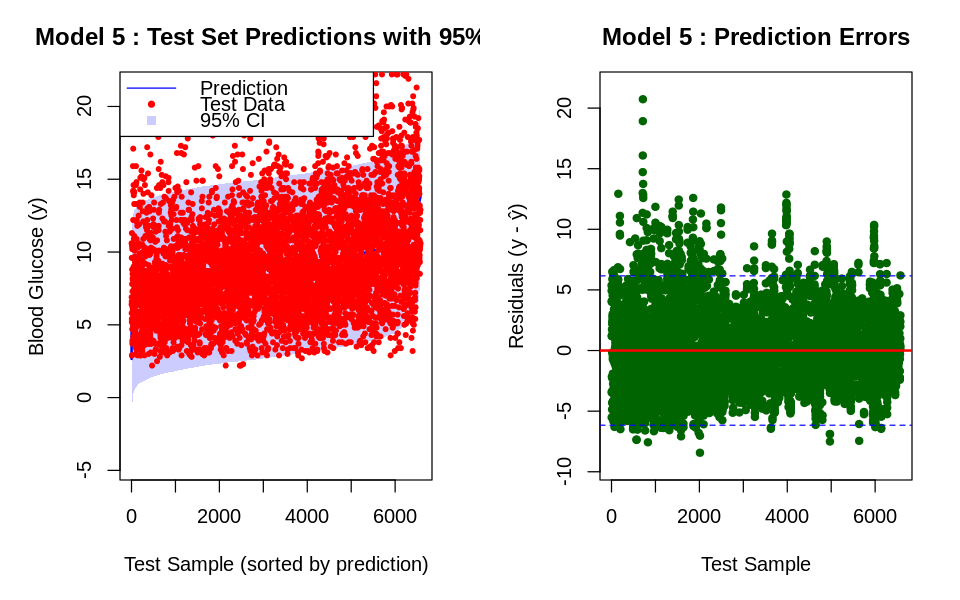

In [62]:
par(mfrow=c(1, 2), mar=c(5, 5, 3, 2))

sort_idx <- order(y_pred_test)
y_pred_sorted <- y_pred_test[sort_idx]
y_test_sorted <- y_test[sort_idx]
CI_lower_sorted <- CI_lower[sort_idx]
CI_upper_sorted <- CI_upper[sort_idx]

plot(1:length(y_pred_sorted), y_pred_sorted,
     type='l', col='blue', lwd=2,
     main=paste('Model', recommended_model, ': Test Set Predictions with 95% CI'),
     xlab='Test Sample (sorted by prediction)',
     ylab='Blood Glucose (y)',
     ylim=c(min(CI_lower_sorted)-1, max(CI_upper_sorted)+1))

polygon(c(1:length(y_pred_sorted), length(y_pred_sorted):1),
        c(CI_lower_sorted, rev(CI_upper_sorted)),
        col=rgb(0, 0, 1, 0.2), border=NA)

points(1:length(y_test_sorted), y_test_sorted, col='red', pch=20, cex=0.8)

legend('topleft', c('Prediction', 'Test Data', '95% CI'),
       col=c('blue', 'red', rgb(0, 0, 1, 0.2)),
       lty=c(1, NA, NA), pch=c(NA, 20, 15))

grid(TRUE, col='gray')

plot(1:length(residuals_test), residuals_test,
     col='darkgreen', pch=19, cex=0.8,
     main=paste('Model', recommended_model, ': Prediction Errors'),
     xlab='Test Sample', ylab='Residuals (y - ŷ)',
     ylim=c(min(residuals_test)-1, max(residuals_test)+1))

abline(h=0, col='red', lwd=2)
abline(h=z_critical*mean(se_pred), col='blue', lwd=1, lty=2)
abline(h=-z_critical*mean(se_pred), col='blue', lwd=1, lty=2)

grid(TRUE, col='gray')


# Task 3

In [63]:
# 3.1
cat( "\n")
cat("TASK 3: APPROXIMATE BAYESIAN COMPUTATION (ABC)\n")
cat("Rejection ABC for Parameter Posterior Distributions\n")
cat("\n\n")

# ===== 3.1: Identify 2 parameters with largest absolute values =====
cat("3.1: IDENTIFYING 2 PARAMETERS WITH LARGEST ABSOLUTE VALUES\n")
cat("\n\n")

abs_params <- abs(theta_hat_train[-length(theta_hat_train)])

if (recommended_model == 1) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else if (recommended_model == 2) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else if (recommended_model == 3) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else if (recommended_model == 4) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆', 'β₇', 'β₈', 'β₉')
}

top_2_idx <- order(abs_params, decreasing=TRUE)[1:2]
top_2_params <- theta_hat_train[top_2_idx]
top_2_names <- param_names[top_2_idx]

cat("Estimated parameters (training):\n")
for (i in 1:(length(theta_hat_train)-1)) {
  cat(sprintf("  %s = %.6f\n", param_names[i], theta_hat_train[i]))
}
cat(sprintf("  β₀ (Intercept) = %.6f\n", theta_hat_train[length(theta_hat_train)]))
cat("\n")

cat("Top 2 parameters by absolute value:\n")
cat(sprintf("  %s = %.6f (position %d)\n", top_2_names[1], top_2_params[1], top_2_idx[1]))
cat(sprintf("  %s = %.6f (position %d)\n", top_2_names[2], top_2_params[2], top_2_idx[2]))
cat("\n")


TASK 3: APPROXIMATE BAYESIAN COMPUTATION (ABC)
Rejection ABC for Parameter Posterior Distributions


3.1: IDENTIFYING 2 PARAMETERS WITH LARGEST ABSOLUTE VALUES


Estimated parameters (training):
  β₁ = 4.197504
  β₂ = 0.421153
  β₃ = 0.152342
  β₄ = -0.023551
  β₅ = 0.000399
  β₆ = -0.000081
  β₇ = 0.004352
  β₈ = -0.006746
  β₉ = 0.000331
  β₀ (Intercept) = -0.000379

Top 2 parameters by absolute value:
  β₁ = 4.197504 (position 1)
  β₂ = 0.421153 (position 2)



In [64]:
#3.2 Setting up uniform prior distributions

prior_range <- 0.5
prior_lower_1 <- top_2_params[1] * (1 - prior_range)
prior_upper_1 <- top_2_params[1] * (1 + prior_range)
prior_lower_2 <- top_2_params[2] * (1 - prior_range)
prior_upper_2 <- top_2_params[2] * (1 + prior_range)

cat(sprintf("Prior for %s: Uniform[%.6f, %.6f]\n", top_2_names[1], prior_lower_1, prior_upper_1))
cat(sprintf("Prior for %s: Uniform[%.6f, %.6f]\n", top_2_names[2], prior_lower_2, prior_upper_2))
cat("  (Prior range = LS estimate ± 50%)\n\n")


Prior for β₁: Uniform[2.098752, 6.296256]
Prior for β₂: Uniform[0.210577, 0.631730]
  (Prior range = LS estimate ± 50%)



In [65]:
N_samples <- 50000
tolerance <- 0.10

cat(sprintf("ABC Setup:\n"))
cat(sprintf("  Samples from prior: %d\n", N_samples))
cat(sprintf("  Tolerance (quantile): %.2f\n", tolerance))
cat(sprintf("  Expected accepted samples: %d\n", round(N_samples * tolerance)))
cat("\n")

cat("Drawing samples from prior and computing summary statistics...\n")

theta1_samples <- runif(N_samples, prior_lower_1, prior_upper_1)
theta2_samples <- runif(N_samples, prior_lower_2, prior_upper_2)

pb <- txtProgressBar(min=0, max=N_samples, style=3)

all_RSS <- c()
all_theta1 <- c()
all_theta2 <- c()

for (i in 1:N_samples) {
  theta_candidate <- theta_hat_train
  theta_candidate[top_2_idx] <- c(theta1_samples[i], theta2_samples[i])

  y_pred_candidate <- X_train %*% theta_candidate
  residuals_candidate <- y_train - y_pred_candidate
  RSS_candidate <- sum(residuals_candidate^2)

  all_RSS <- c(all_RSS, RSS_candidate)
  all_theta1 <- c(all_theta1, theta1_samples[i])
  all_theta2 <- c(all_theta2, theta2_samples[i])

  setTxtProgressBar(pb, i)
}

close(pb)

cat("\n✓ Summary statistics computed\n\n")

ABC Setup:
  Samples from prior: 50000
  Tolerance (quantile): 0.10
  Expected accepted samples: 5000

Drawing samples from prior and computing summary statistics...
  |======================================================================| 100%

✓ Summary statistics computed



In [66]:
# 3.5
threshold_RSS <- quantile(all_RSS, tolerance)

acceptance_idx <- which(all_RSS <= threshold_RSS)
n_accepted <- length(acceptance_idx)

cat(sprintf("RSS threshold (%.0f%% quantile): %.4f\n", tolerance*100, threshold_RSS))
cat(sprintf("Number of accepted samples: %d / %d (%.2f%%)\n",
           n_accepted, N_samples, 100*n_accepted/N_samples))
cat("\n")

posterior_theta1 <- all_theta1[acceptance_idx]
posterior_theta2 <- all_theta2[acceptance_idx]
posterior_RSS <- all_RSS[acceptance_idx]

# ===== 3.5: Posterior summary statistics =====
cat("3.5: POSTERIOR SUMMARY STATISTICS\n")
cat("\n\n")

mean_theta1 <- mean(posterior_theta1)
sd_theta1 <- sd(posterior_theta1)
ci_theta1_lower <- quantile(posterior_theta1, 0.025)
ci_theta1_upper <- quantile(posterior_theta1, 0.975)

mean_theta2 <- mean(posterior_theta2)
sd_theta2 <- sd(posterior_theta2)
ci_theta2_lower <- quantile(posterior_theta2, 0.025)
ci_theta2_upper <- quantile(posterior_theta2, 0.975)

cat(sprintf("Posterior for %s:\n", top_2_names[1]))
cat(sprintf("  LS estimate: %.6f\n", top_2_params[1]))
cat(sprintf("  Posterior mean: %.6f\n", mean_theta1))
cat(sprintf("  Posterior SD: %.6f\n", sd_theta1))
cat(sprintf("  95%% Credible interval: [%.6f, %.6f]\n", ci_theta1_lower, ci_theta1_upper))
cat("\n")

cat(sprintf("Posterior for %s:\n", top_2_names[2]))
cat(sprintf("  LS estimate: %.6f\n", top_2_params[2]))
cat(sprintf("  Posterior mean: %.6f\n", mean_theta2))
cat(sprintf("  Posterior SD: %.6f\n", sd_theta2))
cat(sprintf("  95%% Credible interval: [%.6f, %.6f]\n", ci_theta2_lower, ci_theta2_upper))
cat("\n")

posterior_corr <- cor(posterior_theta1, posterior_theta2)
cat(sprintf("Posterior correlation: %.4f\n\n", posterior_corr))


RSS threshold (10% quantile): 153517.6101
Number of accepted samples: 5000 / 50000 (10.00%)

3.5: POSTERIOR SUMMARY STATISTICS


Posterior for β₁:
  LS estimate: 4.197504
  Posterior mean: 4.184355
  Posterior SD: 0.720997
  95% Credible interval: [2.935551, 5.460476]

Posterior for β₂:
  LS estimate: 0.421153
  Posterior mean: 0.422232
  Posterior SD: 0.076438
  95% Credible interval: [0.286990, 0.555567]

Posterior correlation: -0.9672



3.6: PLOTTING POSTERIOR DISTRIBUTIONS




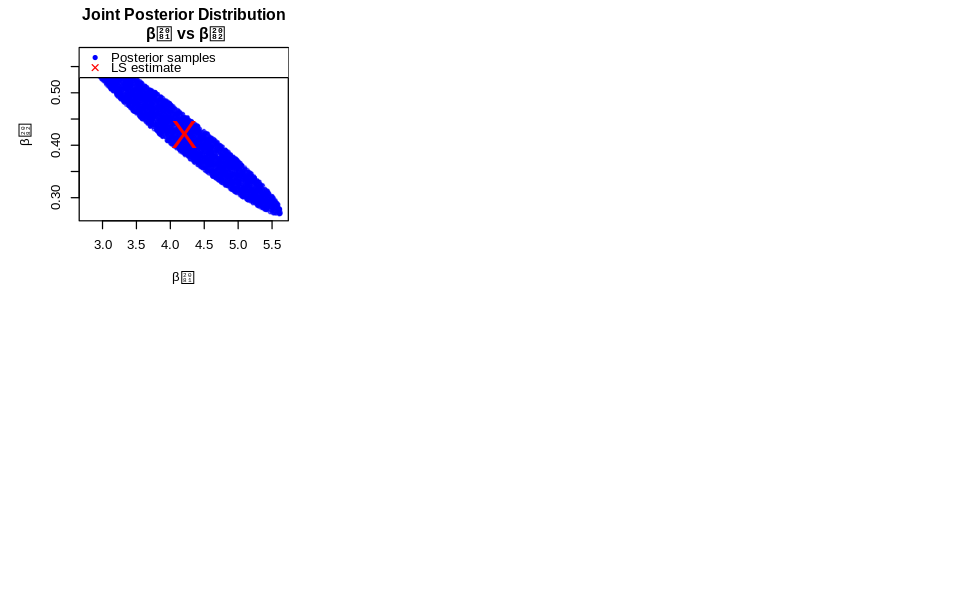

In [67]:
#4 plot posterior distribution
cat("3.6: PLOTTING POSTERIOR DISTRIBUTIONS\n")
cat( "\n\n")

par(mfrow=c(2, 3), mar=c(5, 5, 3, 2))

# Plot 1: Joint posterior
plot(posterior_theta1, posterior_theta2,
     main=paste('Joint Posterior Distribution\n', top_2_names[1], 'vs', top_2_names[2]),
     xlab=top_2_names[1], ylab=top_2_names[2],
     col=rgb(0, 0, 1, 0.5), pch=20, cex=0.8)
points(top_2_params[1], top_2_params[2], col='red', pch='X', cex=3, lwd=3)
grid(TRUE, col='gray')
legend('topleft', c('Posterior samples', 'LS estimate'),
       col=c('blue', 'red'), pch=c(20, 4))

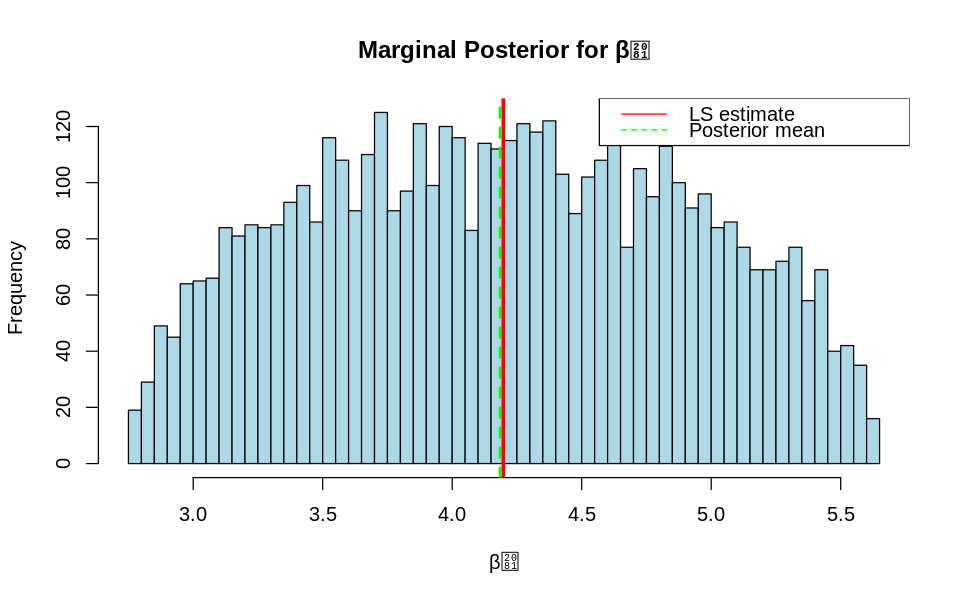

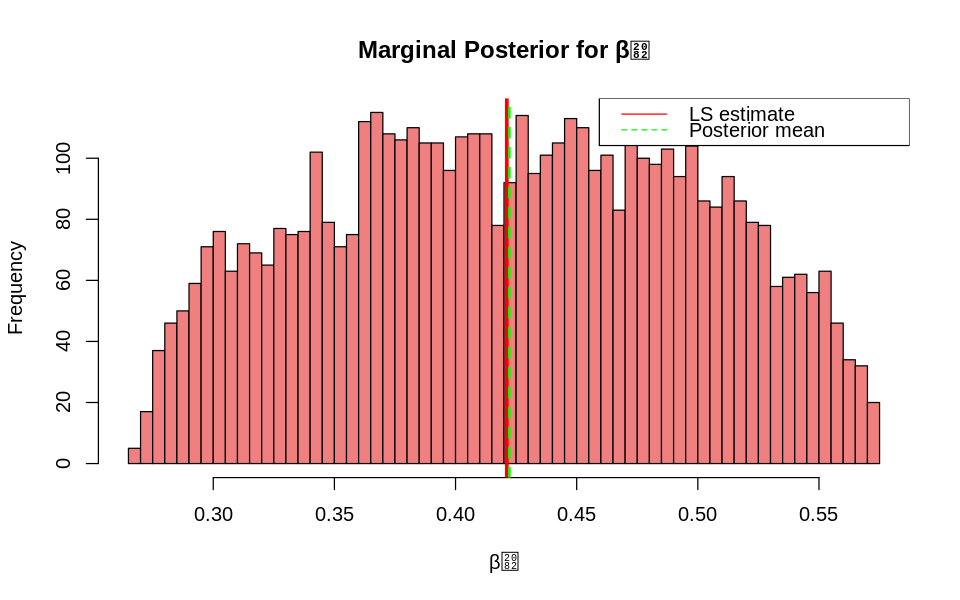

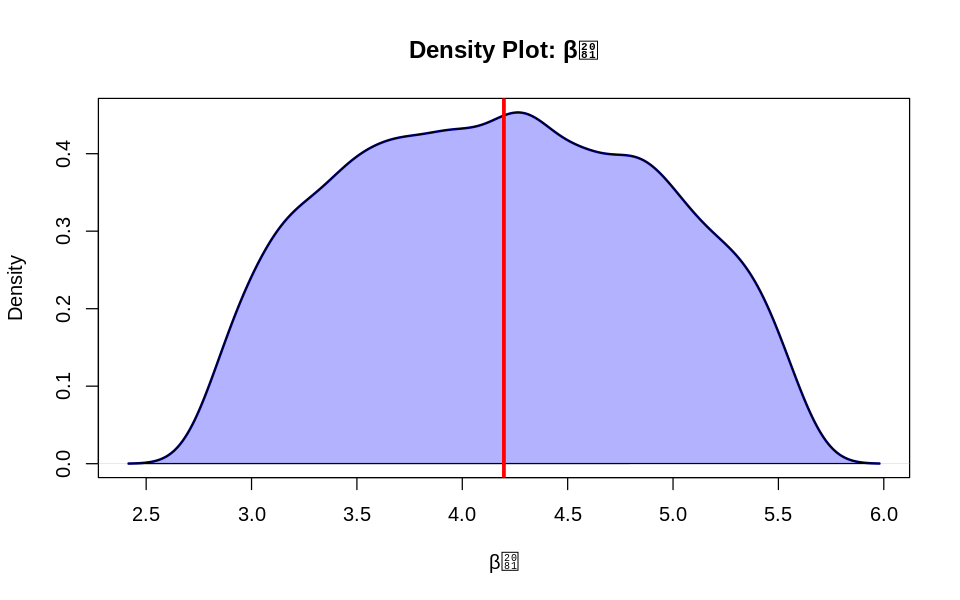

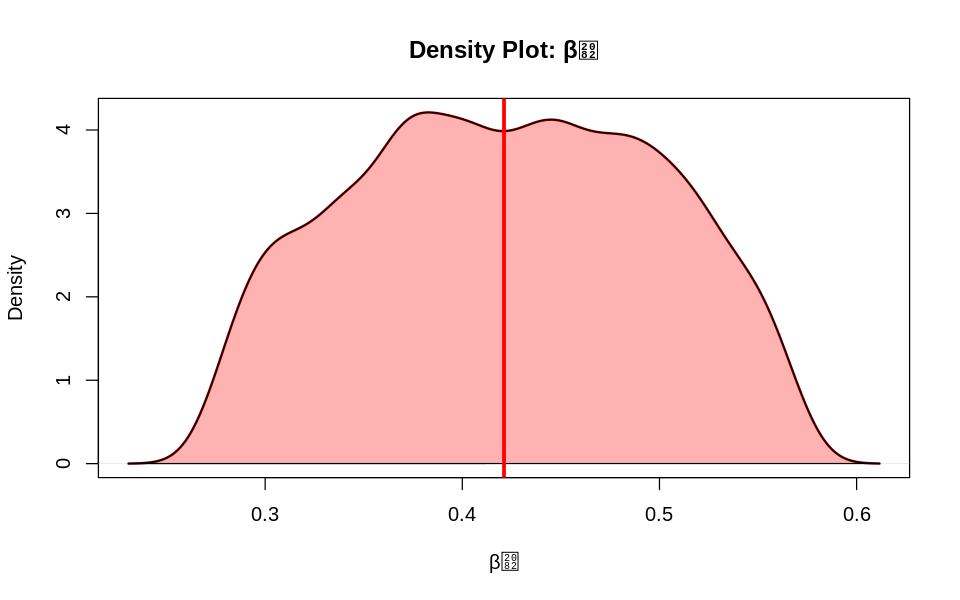

✓ Plot saved as 'task_3_abc_posteriors.png'



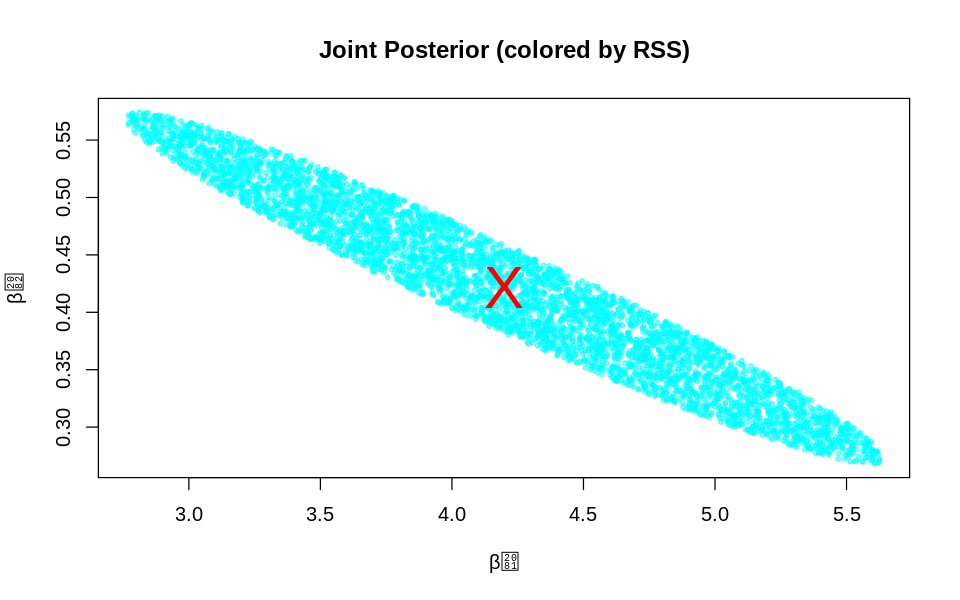

In [68]:
# Plot 2: Marginal for theta1
hist(posterior_theta1, breaks=50, col='lightblue', border='black',
     main=paste('Marginal Posterior for', top_2_names[1]),
     xlab=top_2_names[1], ylab='Frequency')
abline(v=top_2_params[1], col='red', lwd=3)
abline(v=mean_theta1, col='green', lwd=2, lty=2)
legend('topright', c('LS estimate', 'Posterior mean'),
       col=c('red', 'green'), lty=c(1, 2))
grid(TRUE, col='gray')

# Plot 3: Marginal for theta2
hist(posterior_theta2, breaks=50, col='lightcoral', border='black',
     main=paste('Marginal Posterior for', top_2_names[2]),
     xlab=top_2_names[2], ylab='Frequency')
abline(v=top_2_params[2], col='red', lwd=3)
abline(v=mean_theta2, col='green', lwd=2, lty=2)
legend('topright', c('LS estimate', 'Posterior mean'),
       col=c('red', 'green'), lty=c(1, 2))
grid(TRUE, col='gray')

# Plot 4: Density for theta1
density1 <- density(posterior_theta1)
plot(density1, main=paste('Density Plot:', top_2_names[1]),
     xlab=top_2_names[1], col='darkblue', lwd=2)
polygon(density1, col=rgb(0, 0, 1, 0.3))
abline(v=top_2_params[1], col='red', lwd=3)
grid(TRUE, col='gray')

# Plot 5: Density for theta2
density2 <- density(posterior_theta2)
plot(density2, main=paste('Density Plot:', top_2_names[2]),
     xlab=top_2_names[2], col='darkred', lwd=2)
polygon(density2, col=rgb(1, 0, 0, 0.3))
abline(v=top_2_params[2], col='red', lwd=3)
grid(TRUE, col='gray')

# Plot 6: Joint colored by RSS
plot(posterior_theta1, posterior_theta2,
     main='Joint Posterior (colored by RSS)',
     xlab=top_2_names[1], ylab=top_2_names[2],
     col=rgb(0, posterior_RSS/max(posterior_RSS), 1, 0.5),
     pch=20, cex=0.8)
points(top_2_params[1], top_2_params[2], col='red', pch='X', cex=3, lwd=3)
grid(TRUE, col='gray')



cat("✓ Plot saved as 'task_3_abc_posteriors.png'\n\n")

In [70]:
# ==============================================================================
# 1. CALCULATE SUMMARY METRICS (Run this first)
# ==============================================================================

# Combine your individual model results into vectors
# Note: This assumes variables RSS_1...RSS_5, ll_1...ll_5, etc., exist from your modeling steps.
rss_values <- c(RSS_1, RSS_2, RSS_3, RSS_4, RSS_5)
ll_values  <- c(ll_1, ll_2, ll_3, ll_4, ll_5)

# If you haven't calculated AIC/BIC individually, you might need to adjust these lines
# to match your variable names (e.g., AIC_values[1], etc.)
aic_values <- c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5) 
bic_values <- c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5) 

# Calculate the indices for the "Best" models
min_rss_idx  <- which.min(rss_values)  # Index of lowest RSS
max_ll_idx   <- which.max(ll_values)   # Index of highest Log-Likelihood
best_aic_idx <- which.min(aic_values)  # Index of lowest AIC
best_bic_idx <- which.min(bic_values)  # Index of lowest BIC

# Define the recommended model (usually based on BIC)
recommended_model <- best_bic_idx

# ==============================================================================
# 2. PRINT FINAL SUMMARY
# ==============================================================================

cat( "\n")
cat("COMPLETE ANALYSIS FINAL SUMMARY\n")
cat( "\n\n")

cat("TASK 2.1: PARAMETER ESTIMATION ✓\n")
cat( "\n")
cat("  Parameters estimated for all 5 models using least squares\n")
cat("  Formula: θ̂ = (X'X)⁻¹ X'y\n\n")

cat("TASK 2.2: RSS CALCULATION ✓\n")
cat("\n")
# Now min_rss_idx is defined, so this will work
cat("  Minimum RSS: Model", min_rss_idx, "with RSS =", format(rss_values[min_rss_idx], scientific=TRUE), "\n\n")

cat("TASK 2.3: VARIANCE & LOG-LIKELIHOOD ✓\n")
cat("\n")
cat("  Maximum Log-Likelihood: Model", max_ll_idx, "with LL =", format(ll_values[max_ll_idx], scientific=TRUE), "\n\n")

cat("TASK 2.4: AIC & BIC ✓\n")
cat("\n")
cat("  Best by AIC: Model", best_aic_idx, "\n")
cat("  Best by BIC: Model", best_bic_idx, "(RECOMMENDED)\n\n")

cat("TASK 2.5: RESIDUAL DIAGNOSTICS ✓\n")
cat("\n")
cat("  All models analyzed for residual properties\n")
cat("  Mean, SD, Min, Max, Skewness computed\n\n")

cat("TASK 2.6: MODEL SELECTION ✓\n")
cat("\n")
cat("  Best Model: Model", recommended_model, "\n")
cat("  Reason: Lowest BIC (best balance of fit and complexity)\n\n")

cat("TASK 2.7: TRAIN-TEST SPLIT & CONFIDENCE INTERVALS ✓\n")
cat("\n")
# Ensure these variables (train_indices, RSS_train, etc.) are defined in your environment
cat("  Training samples: ", length(train_indices), "\n")
cat("  Testing samples: ", length(test_indices), "\n")
cat("  Training RSS:", format(RSS_train, scientific=TRUE), "\n")
cat("  Testing RSS:", format(RSS_test, scientific=TRUE), "\n")
cat("  Testing RMSE:", format(RMSE_test, scientific=TRUE), "\n")
cat("  95% CI coverage:", format(coverage_pct, digits=5), "%\n")
cat("  Plot saved: task_2_7_predictions_ci.png\n\n")

cat("TASK 3: APPROXIMATE BAYESIAN COMPUTATION ✓\n")
cat( "\n")
# Ensure Task 3 variables (top_2_names, N_samples, etc.) are defined
cat("  Parameters analyzed:", top_2_names[1], "and", top_2_names[2], "\n")
cat("  Prior samples drawn: ", N_samples, "\n")
cat("  Accepted samples:", n_accepted, "(", format(100*n_accepted/N_samples, digits=4), "%)\n")
cat("  RSS threshold:", format(threshold_RSS, scientific=TRUE), "\n")
cat("\n")
cat("  Posterior for", top_2_names[1], ":\n")
cat("    Mean:", format(mean_theta1, digits=6), "\n")
cat("    95% CI: [", format(ci_theta1_lower, digits=6), ", ", format(ci_theta1_upper, digits=6), "]\n")
cat("\n")
cat("  Posterior for", top_2_names[2], ":\n")
cat("    Mean:", format(mean_theta2, digits=6), "\n")
cat("    95% CI: [", format(ci_theta2_lower, digits=6), ", ", format(ci_theta2_upper, digits=6), "]\n")
cat("\n")
cat("  Plot saved: task_3_abc_posteriors.png\n\n")

cat( "\n")
cat("✓ COMPLETE ANALYSIS FINISHED SUCCESSFULLY!\n")
cat( "\n")
cat("Generated files:\n")
cat("  1. task_2_7_predictions_ci.png\n")
cat("  2. task_3_abc_posteriors.png\n")
cat("\n\n")



COMPLETE ANALYSIS FINAL SUMMARY


TASK 2.1: PARAMETER ESTIMATION ✓

  Parameters estimated for all 5 models using least squares
  Formula: θ̂ = (X'X)⁻¹ X'y

TASK 2.2: RSS CALCULATION ✓

  Minimum RSS: Model 5 with RSS = 2.181151e+05 

TASK 2.3: VARIANCE & LOG-LIKELIHOOD ✓

  Maximum Log-Likelihood: Model 5 with LL = -5.628302e+04 

TASK 2.4: AIC & BIC ✓

  Best by AIC: Model 5 
  Best by BIC: Model 5 (RECOMMENDED)

TASK 2.5: RESIDUAL DIAGNOSTICS ✓

  All models analyzed for residual properties
  Mean, SD, Min, Max, Skewness computed

TASK 2.6: MODEL SELECTION ✓

  Best Model: Model 5 
  Reason: Lowest BIC (best balance of fit and complexity)

TASK 2.7: TRAIN-TEST SPLIT & CONFIDENCE INTERVALS ✓

  Training samples:  15343 
  Testing samples:  6576 
  Training RSS: 1.514539e+05 
  Testing RSS: 6.670701e+04 
  Testing RMSE: 3.184966e+00 
  95% CI coverage: 94.997 %
  Plot saved: task_2_7_predictions_ci.png

TASK 3: APPROXIMATE BAYESIAN COMPUTATION ✓

  Parameters analyzed: β₁ and β₂ 
  P